# Alumno: Sebastián Espinosa
### Prueba - Aplicando lo Aprendido (Parte 2)

#### Requerimientos:

1. Describe con detenimiento el problema de negocio que se desea resolver, y cómo se va a hacer esto. Indica la metodología, tareas a realizar, variable objetivo a predecir, etc.

Se desea poder entregar una estimación precisa del precio de un boleto de avión, sin embargo, el problema radica en que este precio puede variar según multiples factores, como el destino, temporada, etc...


La expectativa es poder desarrollar un algoritmo que permita entregar dicha estimación precisa considerando todos los factores que entran en juego.

Los pasos a seguir para este proyecto serían:
1. Comprensión del Negocio
2. Comprensión de los Datos
3. Preparación de los Datos
4. Modelado
5. Evaluación
6. Despliegue

La variable objetivo a predecir sería evidentemente el precio de un boleto, a partir de determinadas características dadas.

2. Carga los dataset entregados y genera un reporte de calidad de los mismos. Indica qué estrategias se van a utilizar para aquellos puntos encontrados (Indicar nulos, outliers, valores perdidos, que se hará con esto, etc.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_business = pd.read_excel('business.xlsx')
df_economy = pd.read_excel('economy.xlsx')

In [3]:
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


In [4]:
df_economy.sort_values('date', ascending = False)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
206773,2022-03-31,Vistara,UK,824,20:30:00,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,8640
84009,2022-03-31,Vistara,UK,970,08:45:00,Mumbai,14h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:45:00,Chennai,4249
84016,2022-03-31,Vistara,UK,970,08:45:00,Mumbai,11h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:15:00,Chennai,4348
84015,2022-03-31,Vistara,UK,994,10:25:00,Mumbai,09h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:15:00,Chennai,4348
84014,2022-03-31,Vistara,UK,960,11:55:00,Mumbai,08h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:15:00,Chennai,4348
...,...,...,...,...,...,...,...,...,...,...,...
119792,2022-02-11,Vistara,UK,776,17:35:00,Kolkata,27h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:40:00,Delhi,15414
119793,2022-02-11,Vistara,UK,772,10:25:00,Kolkata,27h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,14:05:00,Delhi,15414
119794,2022-02-11,Vistara,UK,776,17:35:00,Kolkata,28h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:55:00,Delhi,15414
119795,2022-02-11,Indigo,6E,6339,10:20:00,Kolkata,06h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,16:25:00,Delhi,15278


In [5]:
# Comenzaremos uniendo los dataframes. agregando una columna que indicará el tipo de
# vuelo (business o economy)
df_business['type'] = 'business'
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,type
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612,business
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612,business
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220,business
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450,business
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690,business


In [6]:
df_economy['type'] = 'economy'
df_economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,type
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,economy
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,economy
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,economy
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,economy
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,economy


In [7]:
# Unión de Dataframes en uno solo:
df_merged = pd.concat([df_business, df_economy], ignore_index=True)
df_merged.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,type
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612,business
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612,business
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220,business
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450,business
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690,business


In [8]:
# Identificación de valores Nulos
df_merged.apply(lambda x: sum(x.isna()))

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
type          0
dtype: int64

### No existe presencia de valores nulos

In [9]:
# Analizamos los tipos de datos:
df_merged.dtypes

date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken            object
stop                  object
arr_time              object
to                    object
price                 object
type                  object
dtype: object

### Price debe ser convertido a tipo numérico

In [10]:
df_merged['price'] =  pd.to_numeric(df_merged['price'])

ValueError: Unable to parse string "1,14,434" at position 9192

In [11]:
# Nos encontramos con valores que continenen comas.
# Procesamos esta columna para convertirla a numérica correctamente:

# Convertir la columna a tipo string y eliminar comas
df_merged['price'] = df_merged['price'].astype(str).str.replace(',', '').str.strip()

# Ahora convierte la columna a numérico
df_merged['price'] = pd.to_numeric(df_merged['price'], errors='coerce')

In [12]:
# Identificación de valores Nulos
df_merged.apply(lambda x: sum(x.isna()))

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
type          0
dtype: int64

In [13]:
df_merged.shape

(300261, 12)

#### Convertimos los campos dep_time y arr_time a tipo hora:


In [14]:
df_merged['dep_time'] = pd.to_datetime(df_merged['dep_time'], format = '%H:%M:%S')

In [15]:
df_merged['arr_time'] = pd.to_datetime(df_merged['arr_time'], format = '%H:%M:%S')

### Convertimos el campo date a tipo fecha

In [16]:
df_merged['date'] = pd.to_datetime(df_merged['date'], format='%Y-%m-%d')

### Existe una inconsistencia en el campo stop:

In [17]:
df_merged['stop'].unique()

array(['non-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\

Para procesar el campo stop y limpiar los datos, podemos eliminar los caracteres innecesarios como saltos de línea (\n), tabulaciones (\t), y simplificar el texto para que sea más legible. Por ejemplo, transformar los valores en algo como: 'non-stop', '1-stop Via City', o simplemente '1-stop' si no hay una ciudad especificada.

In [18]:
# Limpiar los datos eliminando saltos de línea y tabulaciones
df_merged['stop'] = df_merged['stop'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Eliminar el prefijo "Via" en caso de que no haya una ciudad
df_merged['stop'] = df_merged['stop'].str.replace(r' Via ', ' Via ', regex=True)

# Vemos los resultados:
df_merged['stop'].unique()

array(['non-stop', '1-stop', '1-stop Via IDR', '1-stop Via IXU',
       '1-stop Via Chennai', '1-stop Via Lucknow', '1-stop Via STV',
       '1-stop Via Hyderabad', '1-stop Via GAY', '2+-stop',
       '1-stop Via Guwahati', '1-stop Via GAU', '1-stop Via VTZ',
       '1-stop Via NDC', '1-stop Via IXE', '1-stop Via Raipur',
       '1-stop Via PAT', '1-stop Via RPR', '1-stop Via Patna',
       '1-stop Via Kolkata', '1-stop Via HYD', '1-stop Via Delhi',
       '1-stop Via Bhubaneswar', '1-stop Via BBI', '1-stop Via Surat',
       '1-stop Via Indore', '1-stop Via GOP', '1-stop Via Nagpur',
       '1-stop Via NAG', '1-stop Via Vishakhapatnam',
       '1-stop Via Mangalore', '1-stop Via Mumbai', '1-stop Via KLH',
       '1-stop Via MYQ', '1-stop Via Kolhapur', '1-stop Via JRG',
       '1-stop Via Ranchi', '1-stop Via IXR', '1-stop Via JGB',
       '1-stop Via Mysore'], dtype=object)

In [19]:
# Ahora volveremos a revisar el tipo de datos de cada variable
df_economy.dtypes

date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken            object
stop                  object
arr_time              object
to                    object
price                  int64
type                  object
dtype: object

In [20]:
# Volvemos a identificar la posible presencia de valores nulos:

df_merged.apply(lambda x: sum(x.isna()))

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
type          0
dtype: int64

## Transformar time_taken a numérico:

In [21]:
# Extracción de horas y minutos a partir de expresiones regulares:

df_merged['hours'] = df_merged['time_taken'].str.extract(r'(\d+)h').fillna(0).astype(int)
df_merged['minutes'] = df_merged['time_taken'].str.extract(r'(\d+)m').fillna(0).astype(int)

In [22]:
df_merged.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,type,hours,minutes
0,2022-02-11,Air India,AI,868,1900-01-01 18:00:00,Delhi,02h 00m,non-stop,1900-01-01 20:00:00,Mumbai,25612,business,2,0
1,2022-02-11,Air India,AI,624,1900-01-01 19:00:00,Delhi,02h 15m,non-stop,1900-01-01 21:15:00,Mumbai,25612,business,2,15
2,2022-02-11,Air India,AI,531,1900-01-01 20:00:00,Delhi,24h 45m,1-stop,1900-01-01 20:45:00,Mumbai,42220,business,24,45
3,2022-02-11,Air India,AI,839,1900-01-01 21:25:00,Delhi,26h 30m,1-stop,1900-01-01 23:55:00,Mumbai,44450,business,26,30
4,2022-02-11,Air India,AI,544,1900-01-01 17:15:00,Delhi,06h 40m,1-stop,1900-01-01 23:55:00,Mumbai,46690,business,6,40


In [23]:
# Obtener duración de vuelo en minutos:
df_merged['time_taken_min'] = df_merged['hours'] * 60 + df_merged['minutes']
df_merged['time_taken_hours'] = df_merged['time_taken_min'] / 60
df_merged.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,type,hours,minutes,time_taken_min,time_taken_hours
0,2022-02-11,Air India,AI,868,1900-01-01 18:00:00,Delhi,02h 00m,non-stop,1900-01-01 20:00:00,Mumbai,25612,business,2,0,120,2.000000
1,2022-02-11,Air India,AI,624,1900-01-01 19:00:00,Delhi,02h 15m,non-stop,1900-01-01 21:15:00,Mumbai,25612,business,2,15,135,2.250000
2,2022-02-11,Air India,AI,531,1900-01-01 20:00:00,Delhi,24h 45m,1-stop,1900-01-01 20:45:00,Mumbai,42220,business,24,45,1485,24.750000
3,2022-02-11,Air India,AI,839,1900-01-01 21:25:00,Delhi,26h 30m,1-stop,1900-01-01 23:55:00,Mumbai,44450,business,26,30,1590,26.500000
4,2022-02-11,Air India,AI,544,1900-01-01 17:15:00,Delhi,06h 40m,1-stop,1900-01-01 23:55:00,Mumbai,46690,business,6,40,400,6.666667


In [24]:
df_merged.dtypes

date                datetime64[ns]
airline                     object
ch_code                     object
num_code                     int64
dep_time            datetime64[ns]
from                        object
time_taken                  object
stop                        object
arr_time            datetime64[ns]
to                          object
price                        int64
type                        object
hours                        int32
minutes                      int32
time_taken_min               int32
time_taken_hours           float64
dtype: object

## Dumificación de Variables
* airline
* ch_code
* from
* to
* type
* stop

In [25]:
df_merged_dummy = pd.get_dummies(df_merged, columns=['airline', 'ch_code', 'from', 'to', 'type', 'stop'], drop_first=True)
df_merged_dummy.head()

,date,num_code,dep_time,time_taken,arr_time,price,hours,minutes,time_taken_min,time_taken_hours,...,stop_1-stop Via Patna,stop_1-stop Via RPR,stop_1-stop Via Raipur,stop_1-stop Via Ranchi,stop_1-stop Via STV,stop_1-stop Via Surat,stop_1-stop Via VTZ,stop_1-stop Via Vishakhapatnam,stop_2+-stop,stop_non-stop
0,2022-02-11,868,1900-01-01 18:00:00,02h 00m,1900-01-01 20:00:00,25612,2,0,120,2.000000,...,False,False,False,False,False,False,False,False,False,True
1,2022-02-11,624,1900-01-01 19:00:00,02h 15m,1900-01-01 21:15:00,25612,2,15,135,2.250000,...,False,False,False,False,False,False,False,False,False,True
2,2022-02-11,531,1900-01-01 20:00:00,24h 45m,1900-01-01 20:45:00,42220,24,45,1485,24.750000,...,False,False,False,False,False,False,False,False,False,False
3,2022-02-11,839,1900-01-01 21:25:00,26h 30m,1900-01-01 23:55:00,44450,26,30,1590,26.500000,...,False,False,False,False,False,False,False,False,False,False
4,2022-02-11,544,1900-01-01 17:15:00,06h 40m,1900-01-01 23:55:00,46690,6,40,400,6.666667,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Transformamos las variables de tipo bool a tipo numérico:

# Convertir columnas booleanas a enteros
df_merged_dummy = df_merged_dummy.astype({col: 'int' for col in df_merged_dummy.select_dtypes(include=['bool']).columns})


In [27]:
df_merged_dummy.apply(lambda x: sum(x.isna()))

date                              0
num_code                          0
dep_time                          0
time_taken                        0
arr_time                          0
                                 ..
stop_1-stop Via Surat             0
stop_1-stop Via VTZ               0
stop_1-stop Via Vishakhapatnam    0
stop_2+-stop                      0
stop_non-stop                     0
Length: 74, dtype: int64

In [28]:
df_merged_dummy.dtypes

date                              datetime64[ns]
num_code                                   int64
dep_time                          datetime64[ns]
time_taken                                object
arr_time                          datetime64[ns]
                                       ...      
stop_1-stop Via Surat                      int32
stop_1-stop Via VTZ                        int32
stop_1-stop Via Vishakhapatnam             int32
stop_2+-stop                               int32
stop_non-stop                              int32
Length: 74, dtype: object

3. Genera un análisis exploratorio de los dataset entregados, un análisis univariado y bivariado. Prioriza los gráficos más importantes y entrega una conclusión a partir de estos.

### Análisis univariado: Análisis de una sola variable. El objetivo es describir las características básicas de esa variable, como su distribución, tendencia central (media, mediana), dispersión (desviación estándar, varianza) o forma (sesgo, curtosis).


## Variables Numéricas
#### df_business

In [29]:
df_merged['price'].describe()

count    300261.000000
mean      20883.717666
std       22695.911266
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

<Axes: >

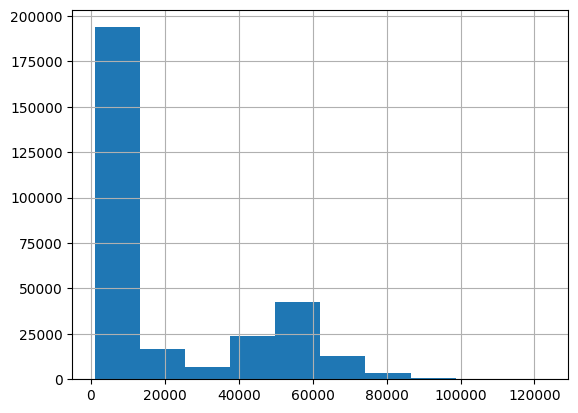

In [30]:
# Visualizar un histograma
df_merged['price'].hist()

<Axes: xlabel='price'>

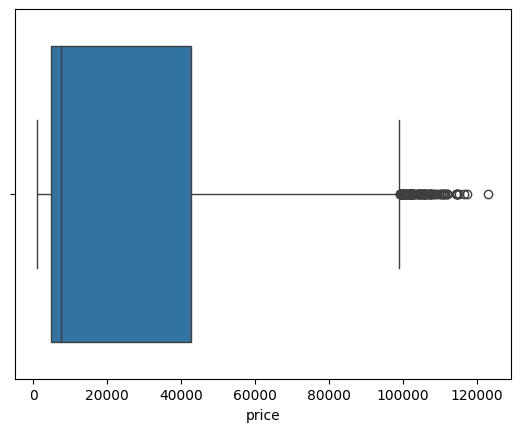

In [31]:
# Boxplot:
sns.boxplot(x=df_merged['price'])

In [32]:
sesgo = df_merged['price'].skew()
print(f'Sesgo: {sesgo}')

Sesgo: 1.0618915252479717


Sesgo < 3 -> **Sesgo hacia la derecha**

In [33]:
curtosis = df_merged['price'].kurtosis()
print(f'Curtosis: {curtosis}')

Curtosis: -0.39514998497304754


Curtosis < 3 -> **Colas más cortas**

In [34]:
df_merged['time_taken_min'].describe()

count    300261.000000
mean        733.066416
std         431.574808
min          50.000000
25%         405.000000
50%         675.000000
75%         970.000000
max        2990.000000
Name: time_taken_min, dtype: float64

<Axes: >

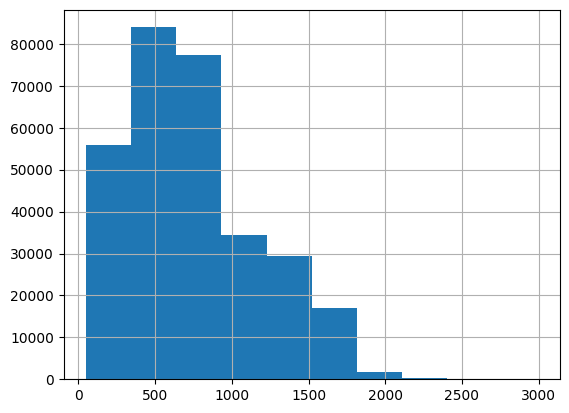

In [35]:
# Visualizar un histograma
df_merged['time_taken_min'].hist()

<Axes: xlabel='time_taken_min'>

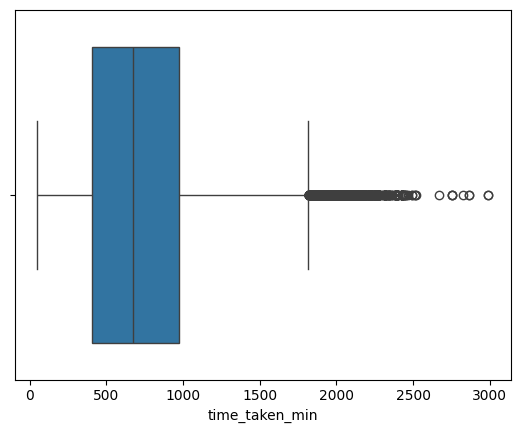

In [36]:
# Boxplot:
sns.boxplot(x=df_merged['time_taken_min'])

In [37]:
sesgo = df_merged['time_taken_min'].skew()
print(f'Sesgo: {sesgo}')

Sesgo: 0.6029801740844973


Sesgo a la derecha

In [38]:
curtosis = df_merged['time_taken_min'].kurtosis()
print(f'Curtosis: {curtosis}')

Curtosis: -0.26900402203714924


Colas más cortas

In [39]:
df_merged['time_taken_hours'].describe()

count    300261.000000
mean         12.217774
std           7.192913
min           0.833333
25%           6.750000
50%          11.250000
75%          16.166667
max          49.833333
Name: time_taken_hours, dtype: float64

<Axes: >

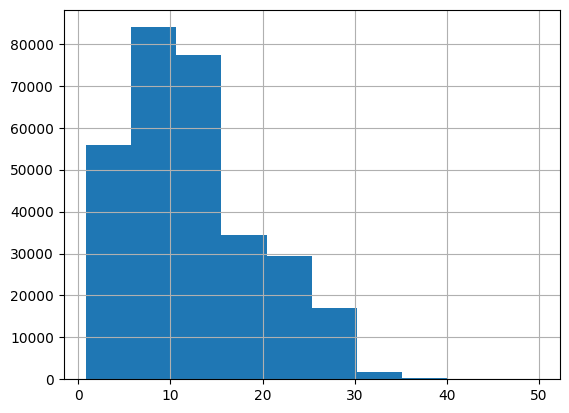

In [40]:
# Visualizar un histograma
df_merged['time_taken_hours'].hist()

<Axes: xlabel='price'>

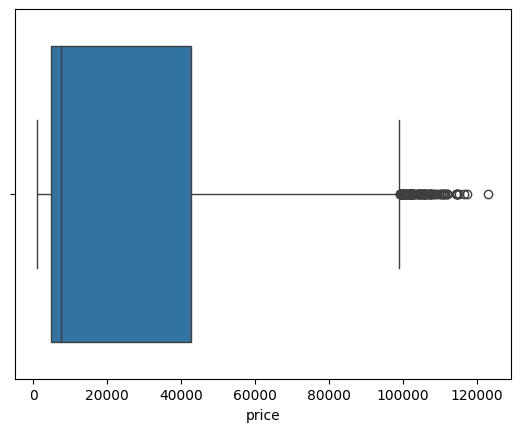

In [41]:
# Boxplot:
sns.boxplot(x=df_merged['price'])

## Variables Categóricas

In [42]:
# Para obtener la tabla de frecuencias
df_merged['from'].value_counts()

from
Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: count, dtype: int64

<Axes: xlabel='from'>

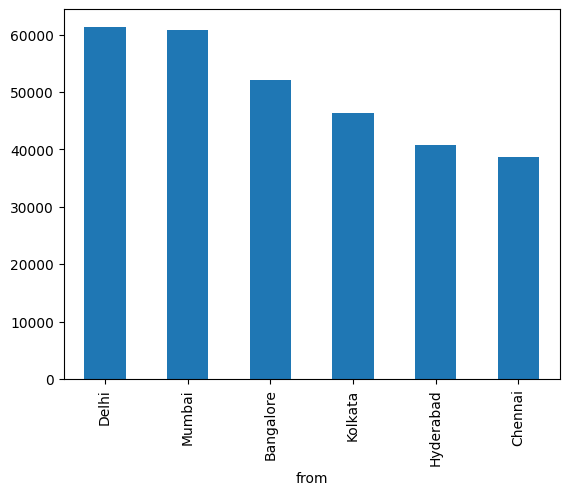

In [43]:
# Visualizar gráfico de barras
df_merged['from'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

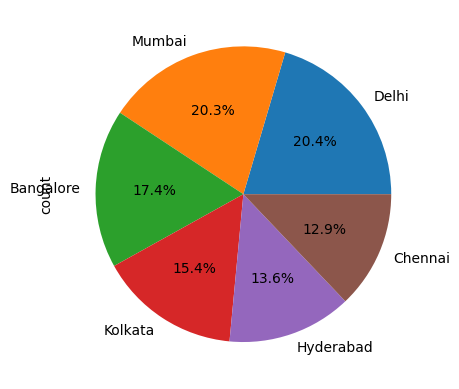

In [44]:
df_merged['from'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [45]:
# Para obtener la tabla de frecuencias
df_merged['to'].value_counts()

to
Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: count, dtype: int64

<Axes: xlabel='to'>

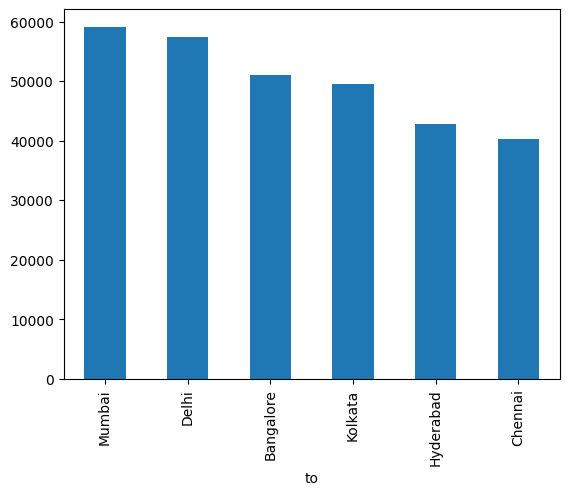

In [46]:
# Visualizar gráfico de barras
df_merged['to'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

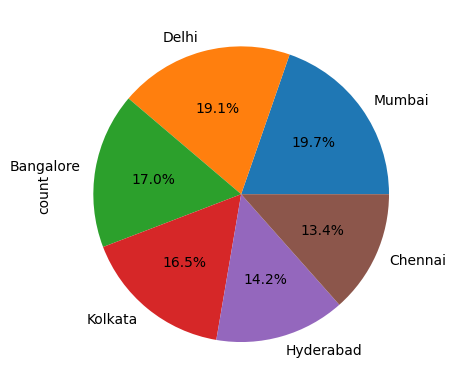

In [47]:
df_merged['to'].value_counts().plot(kind='pie', autopct='%1.1f%%')


In [48]:
# Para obtener la tabla de frecuencias
df_merged['airline'].value_counts()

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

<Axes: ylabel='count'>

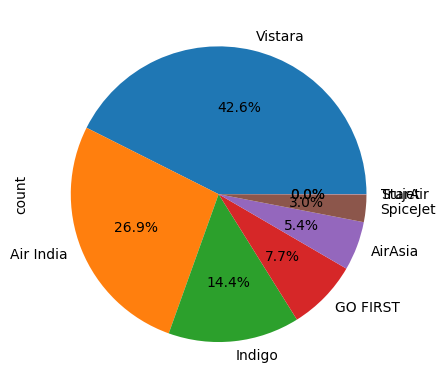

In [49]:
df_merged['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%')

#### df_economy

In [50]:
df_economy['price'].describe()

count    206774.000000
mean       6571.190701
std        3743.442838
min        1105.000000
25%        4173.000000
50%        5772.000000
75%        7746.000000
max       42349.000000
Name: price, dtype: float64

<Axes: >

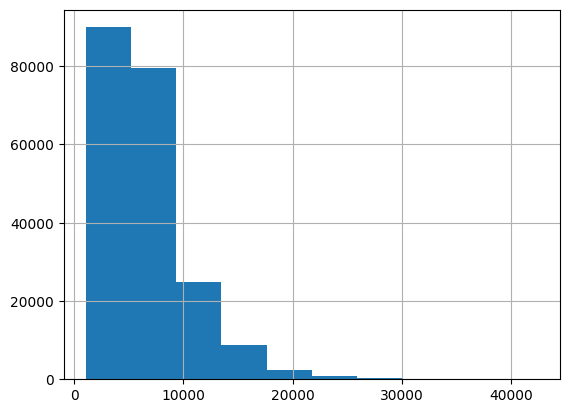

In [51]:
# Visualizar un histograma
df_economy['price'].hist()

<Axes: xlabel='price'>

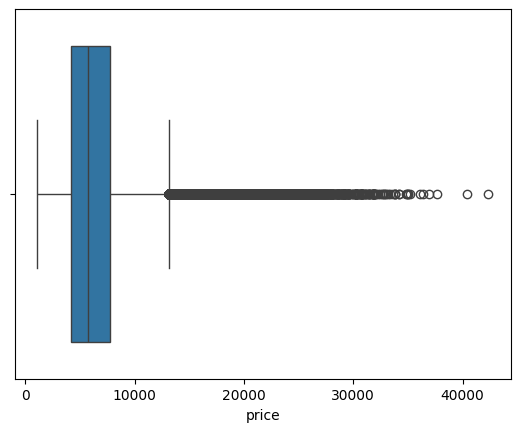

In [52]:
# Boxplot:
sns.boxplot(x=df_economy['price'])

In [53]:
# Para obtener la tabla de frecuencias
df_economy['from'].value_counts()

from
Delhi        43029
Mumbai       41045
Bangalore    35665
Kolkata      32874
Hyderabad    27990
Chennai      26171
Name: count, dtype: int64

<Axes: xlabel='from'>

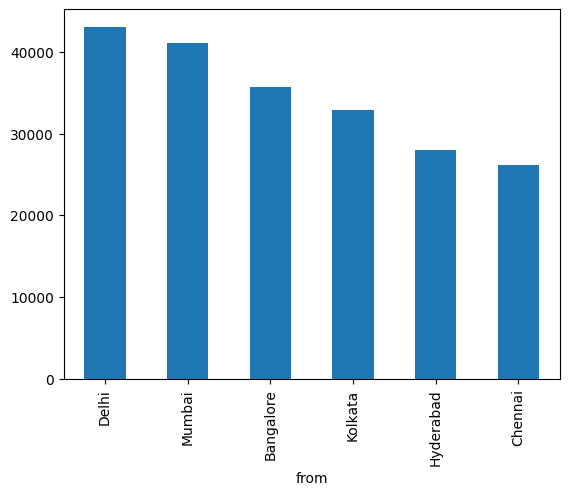

In [54]:
# Visualizar gráfico de barras
df_economy['from'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

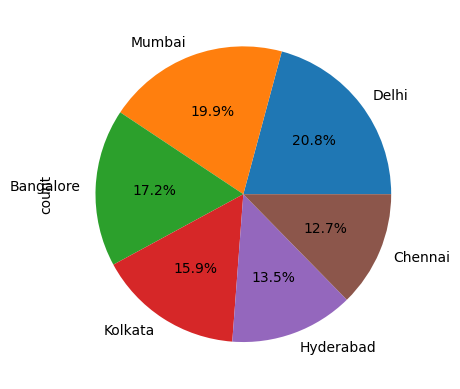

In [55]:
df_economy['from'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [56]:
# Para obtener la tabla de frecuencias
df_economy['to'].value_counts()

to
Delhi        40654
Mumbai       40118
Bangalore    34914
Kolkata      34777
Hyderabad    29101
Chennai      27210
Name: count, dtype: int64

<Axes: xlabel='to'>

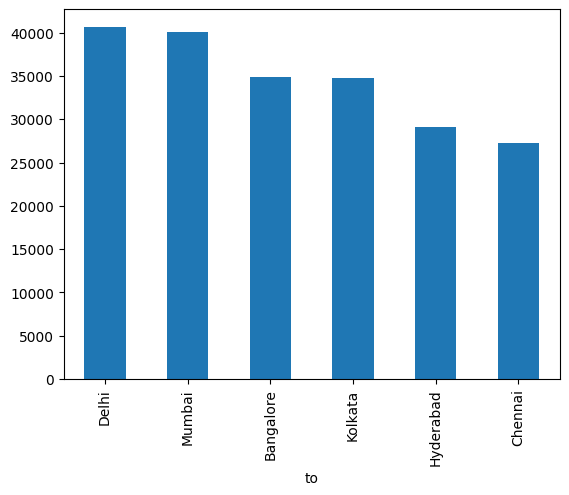

In [57]:
# Visualizar gráfico de barras
df_economy['to'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

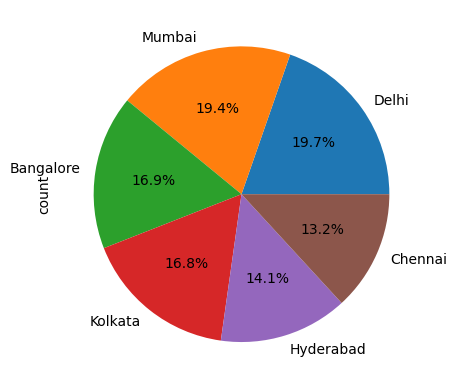

In [58]:
df_economy['to'].value_counts().plot(kind='pie', autopct='%1.1f%%')


A partir de lo anterior, podemos observar que el país de origen del viaje más frecuentado cambia según la clase:
### País de origen más frecuentado:
* Clase Economy: Delhi
* Clase Business: Mumbai

### País de destino más frecuentado:
* Clase Economy: Delhi
* Clase Business: Mumbai

### Análisis Bivariado: Análisis de dos variables simultáneamente, con el objetivo de estudiar la relación entre ellas. Este análisis permite evaluar si existe correlación, dependencia o interacción entre las variables.

In [59]:
df_merged_dummy_var = df_merged_dummy.select_dtypes(include=['number', 'bool'])


In [60]:
df_merged_dummy_var.corr()

,num_code,price,hours,minutes,time_taken_min,time_taken_hours,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,...,stop_1-stop Via Patna,stop_1-stop Via RPR,stop_1-stop Via Raipur,stop_1-stop Via Ranchi,stop_1-stop Via STV,stop_1-stop Via Surat,stop_1-stop Via VTZ,stop_1-stop Via Vishakhapatnam,stop_2+-stop,stop_non-stop
num_code,1.000000,-0.212865,-0.133621,-0.000437,-0.133756,-0.133756,-0.044388,0.004193,0.356645,0.216362,...,-0.017586,-0.003360,-0.007492,0.081945,-0.011962,-0.003442,-0.004480,-0.002438,0.000632,0.076571
price,-0.212865,1.000000,0.205323,-0.025690,0.204471,0.204471,-0.176106,-0.194101,-0.280739,-0.113961,...,0.004574,0.002418,0.000404,-0.011409,0.009922,-0.001095,0.007711,0.000157,-0.064203,-0.187397
hours,-0.133621,0.205323,1.000000,-0.041992,0.999193,0.999193,-0.109046,-0.139880,-0.365541,0.008426,...,0.022016,-0.001301,0.001428,0.005831,0.010863,0.002381,0.022689,0.012350,0.092634,-0.514537
minutes,-0.000437,-0.025690,-0.041992,1.000000,-0.001825,-0.001825,0.018146,0.018476,0.005391,0.010256,...,-0.002491,0.012253,0.026397,-0.002060,-0.008886,0.001367,-0.005389,-0.000454,-0.001455,0.001907
time_taken_min,-0.133756,0.204471,0.999193,-0.001825,1.000000,1.000000,-0.108413,-0.139260,-0.365647,0.008846,...,0.021935,-0.000809,0.002490,0.005754,0.010515,0.002438,0.022492,0.012342,0.092657,-0.514913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stop_1-stop Via Surat,-0.003442,-0.001095,0.002381,0.001367,0.002438,0.002438,-0.001625,-0.001975,-0.002796,-0.001201,...,-0.000324,-0.000058,-0.000126,-0.000133,-0.000162,1.000000,-0.000065,-0.000035,-0.001469,-0.002522
stop_1-stop Via VTZ,-0.004480,0.007711,0.022689,-0.005389,0.022492,0.022492,-0.002257,-0.002743,-0.003883,-0.001668,...,-0.000450,-0.000081,-0.000175,-0.000185,-0.000225,-0.000065,1.000000,-0.000049,-0.002041,-0.003503
stop_1-stop Via Vishakhapatnam,-0.002438,0.000157,0.012350,-0.000454,0.012342,0.012342,-0.001229,-0.001493,-0.002114,-0.000908,...,-0.000245,-0.000044,-0.000095,-0.000101,-0.000122,-0.000035,-0.000049,1.000000,-0.001111,-0.001907
stop_2+-stop,0.000632,-0.064203,0.092634,-0.001455,0.092657,0.092657,0.110252,-0.037540,-0.054039,-0.037850,...,-0.010207,-0.001842,-0.003967,-0.004194,-0.005107,-0.001469,-0.002041,-0.001111,1.000000,-0.079478


4. Realiza un análisis de correlaciones entre las diferentes variables existentes, identificando cuáles son las variables más importantes para la predicción de la variable objetivo. Utiliza las técnicas vistas en el curso.

In [238]:
# Funcion para calcular coef. de pearson:
def plot_lmplot_with_pearson(dataframe, var1, var2):
    
    # Calculo de Correlación de pearson:
    corr = dataframe[var1].corr(dataframe[var2])
    
    # Creación de Gráfico de Dispersión con una recta de regresión lineal
    sns.lmplot(x = var1, y = var2, data = dataframe)
    
    # Anotamos la correlación en el gráfico:
    plt.text(.1, .9, f'Correlación de Pearson: {corr:.2f}', transform = plt.gca().transAxes, fontsize = 12)
            
    # Mostramos el gráfico:
    plt.show()
    
    

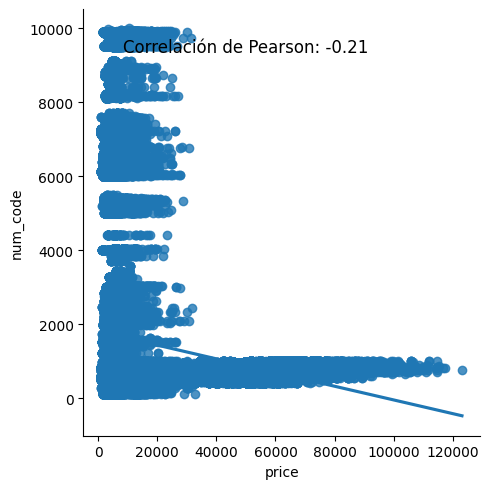

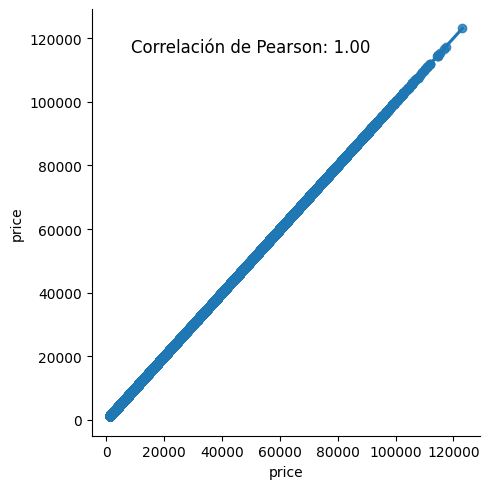

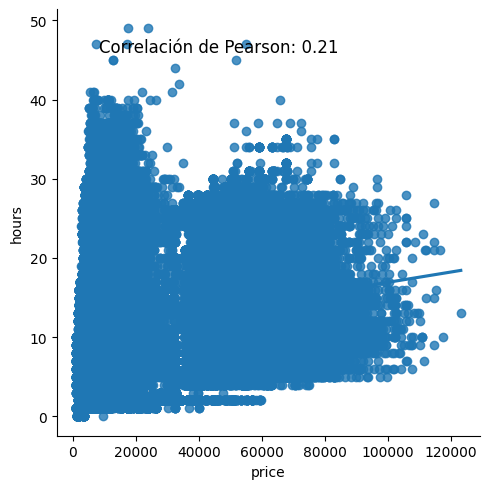

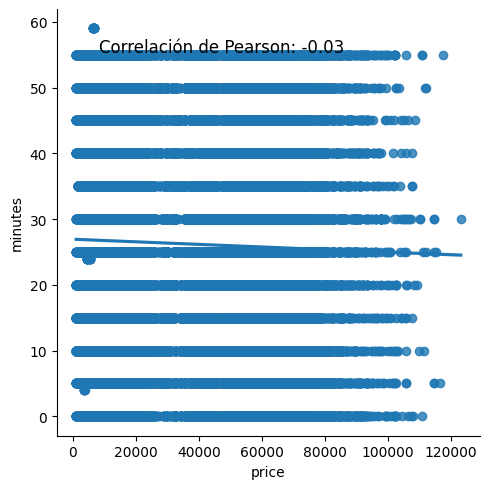

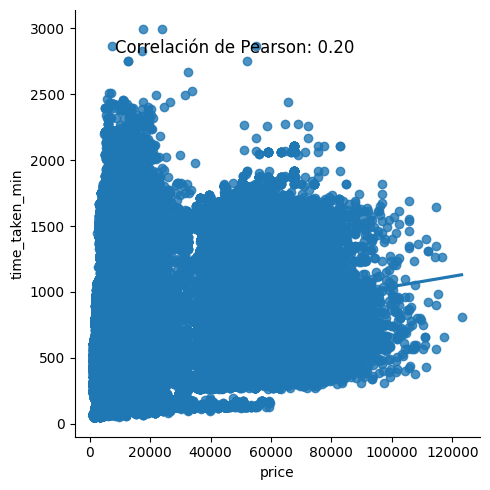

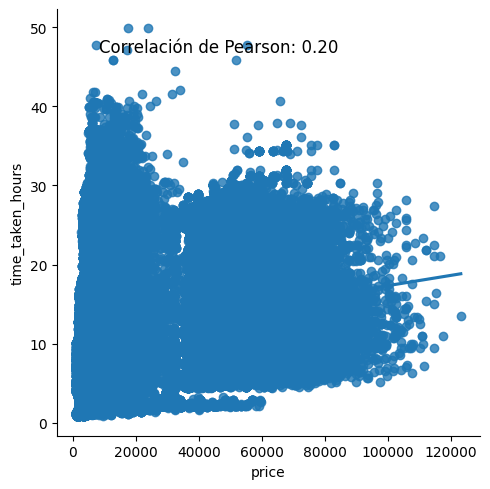

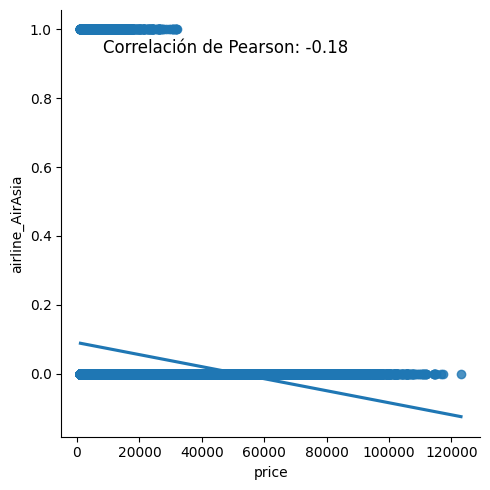

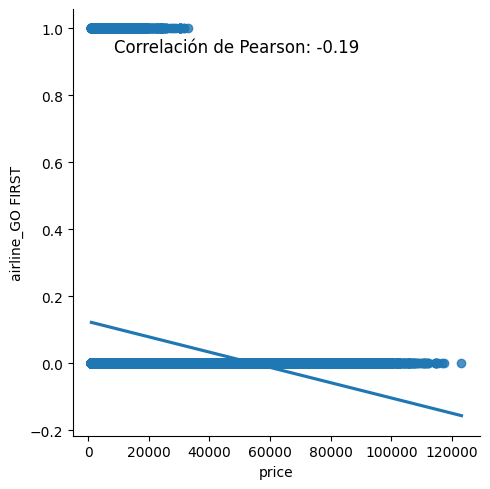

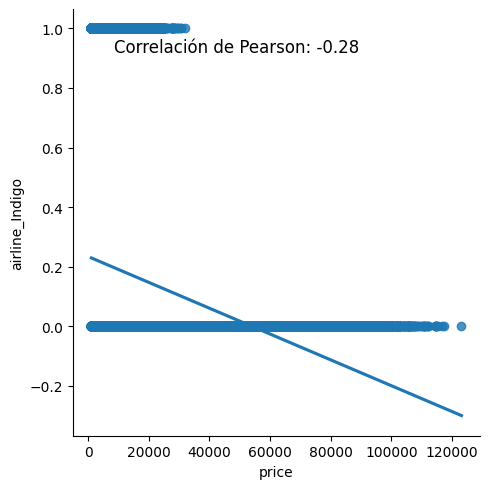

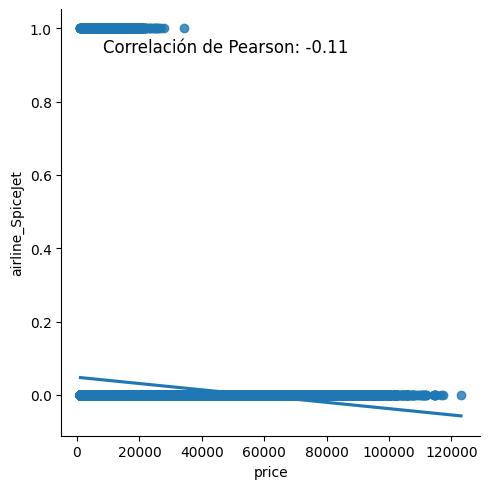

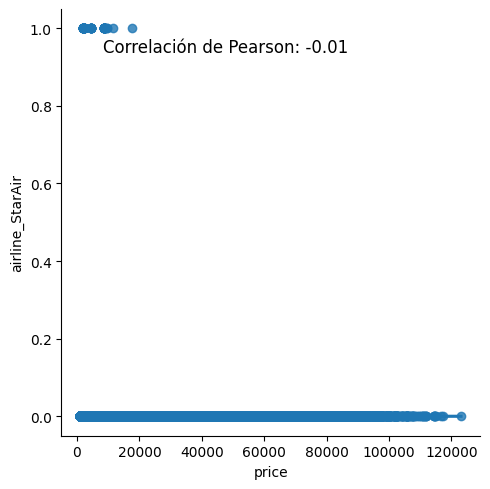

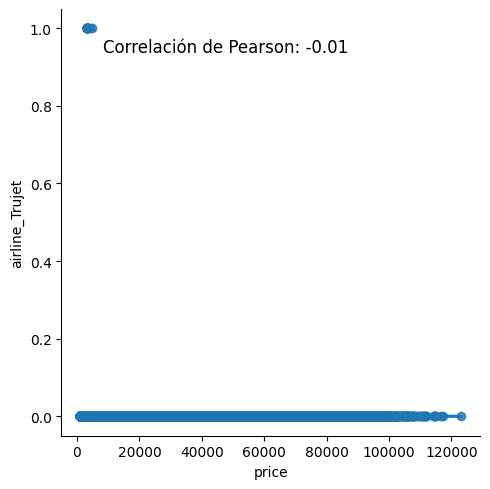

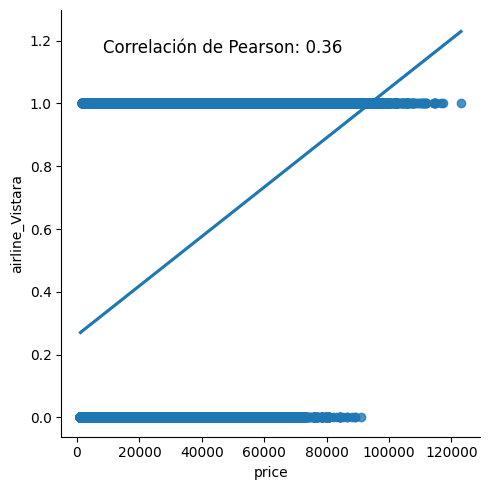

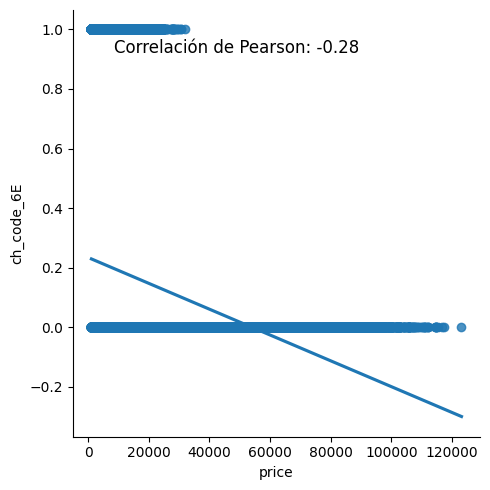

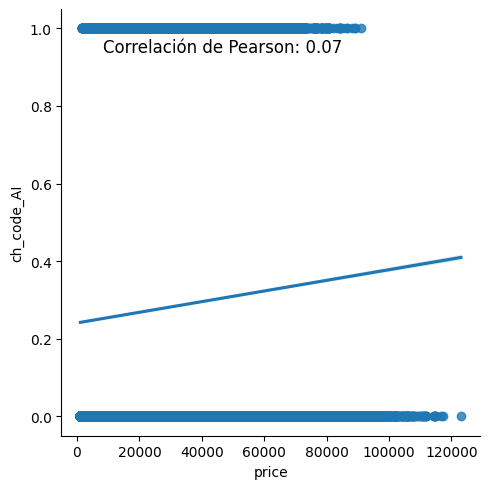

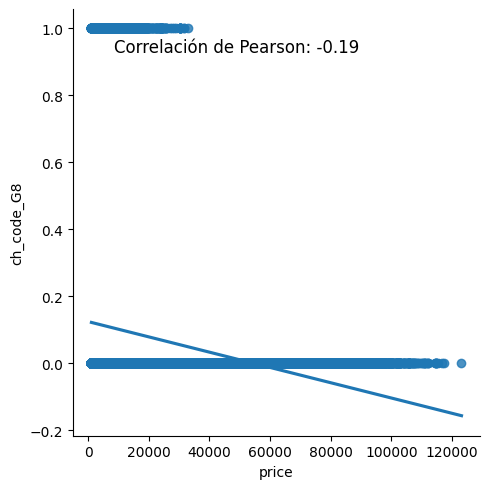

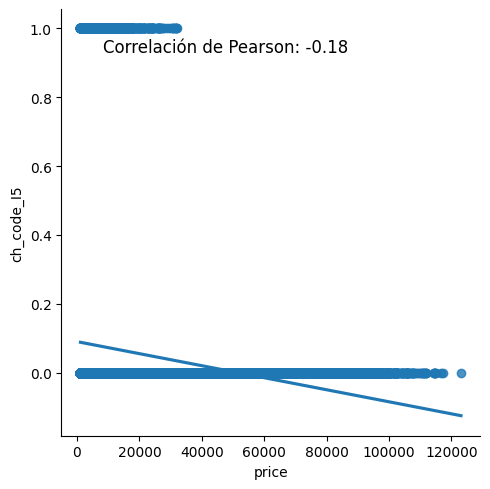

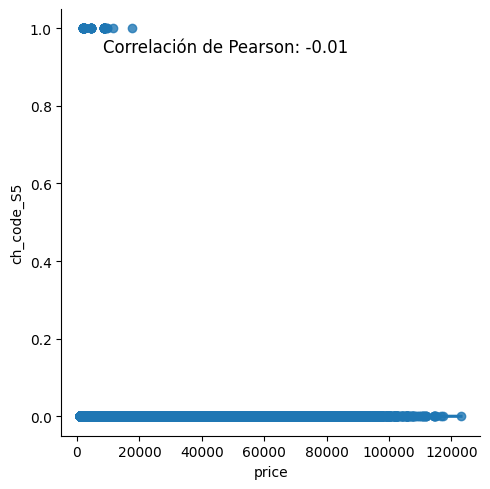

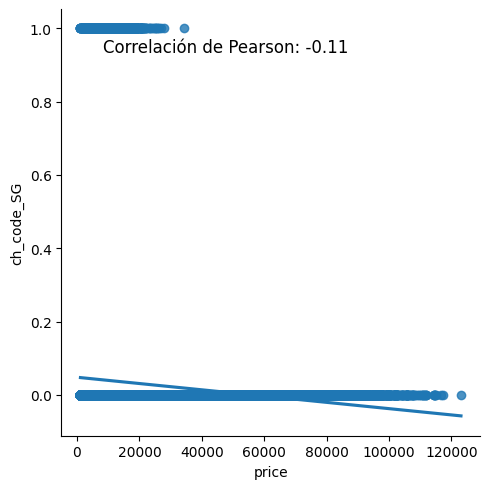

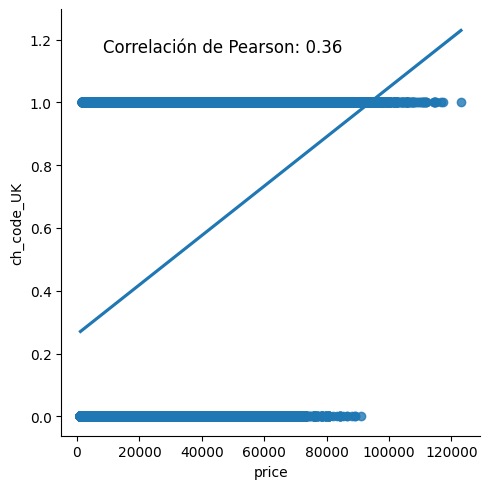

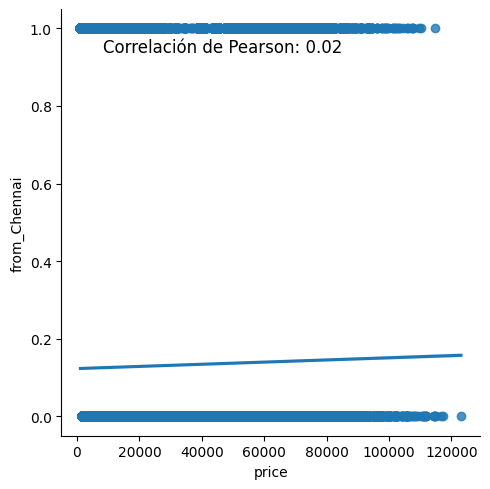

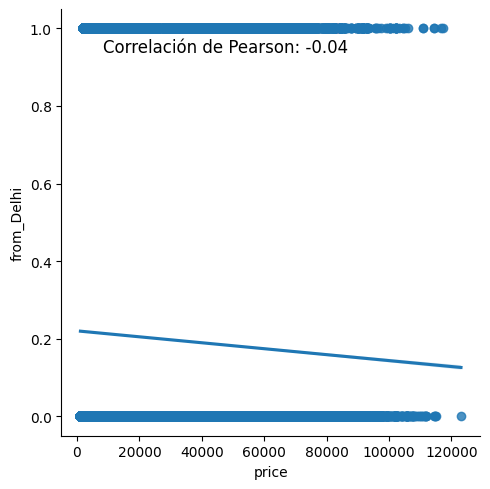

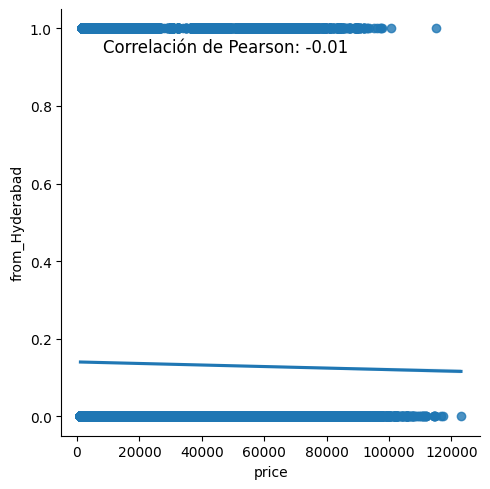

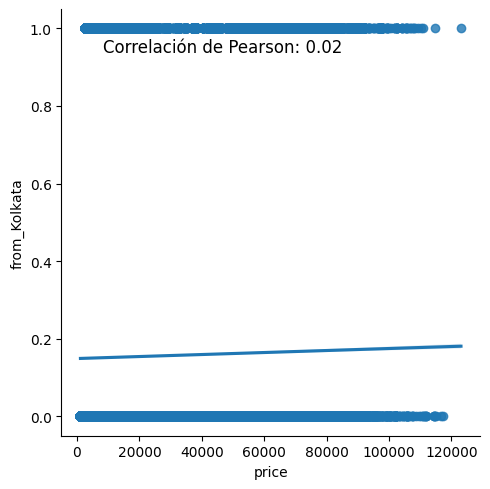

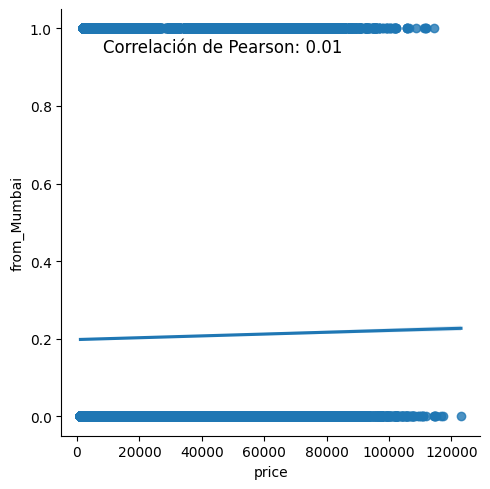

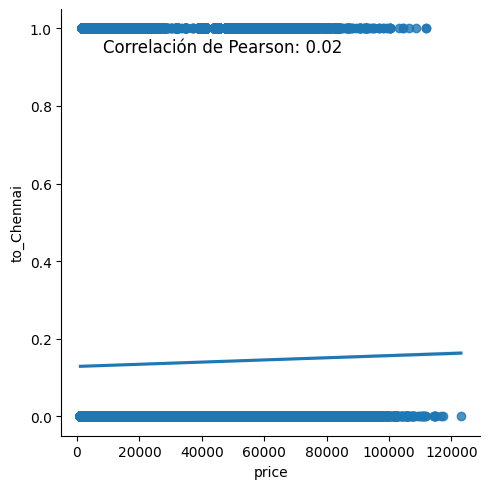

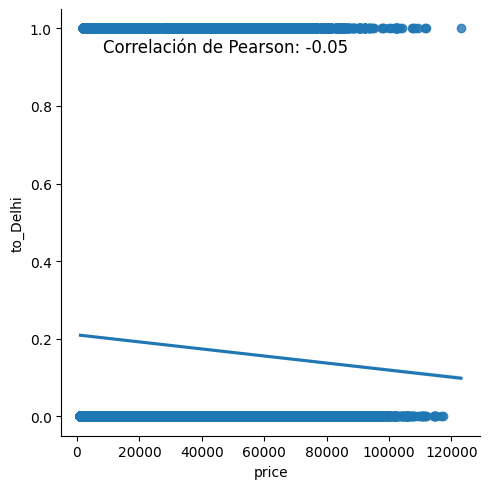

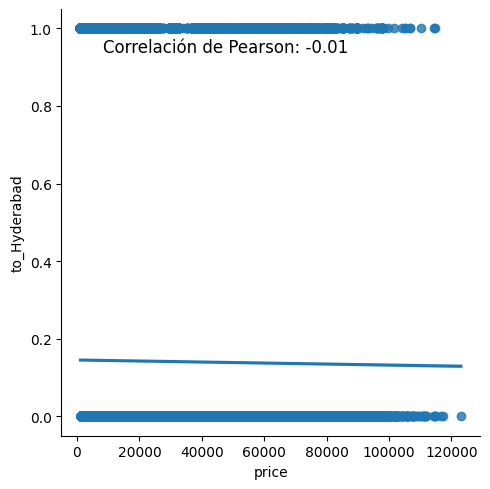

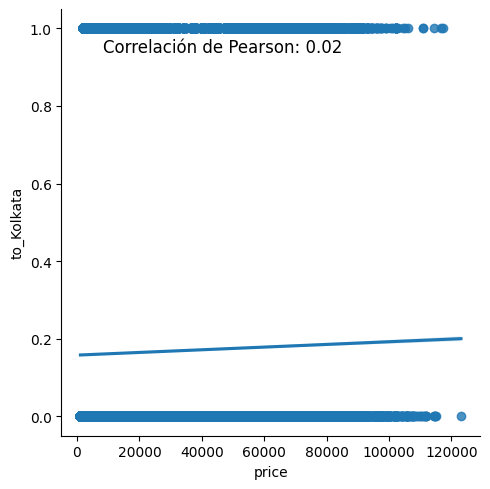

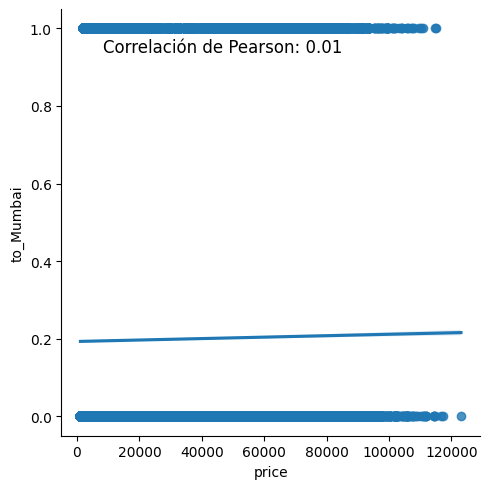

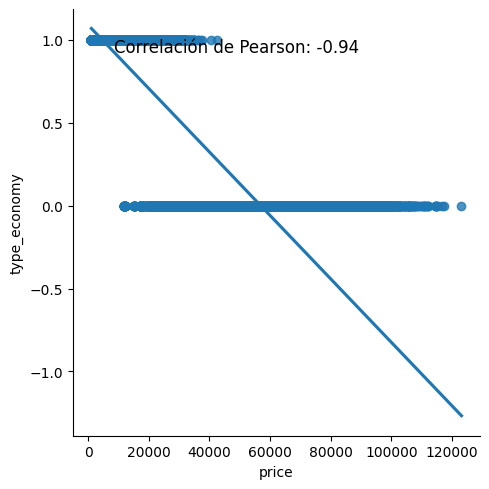

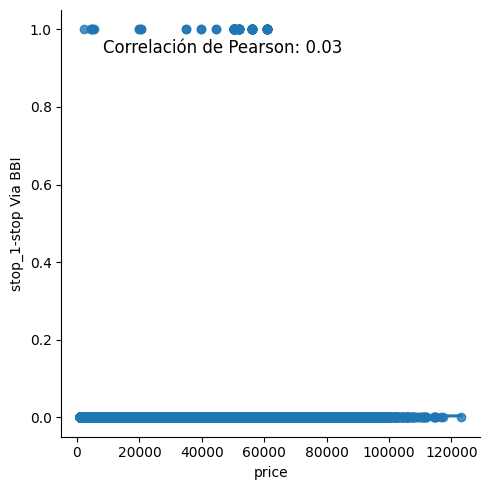

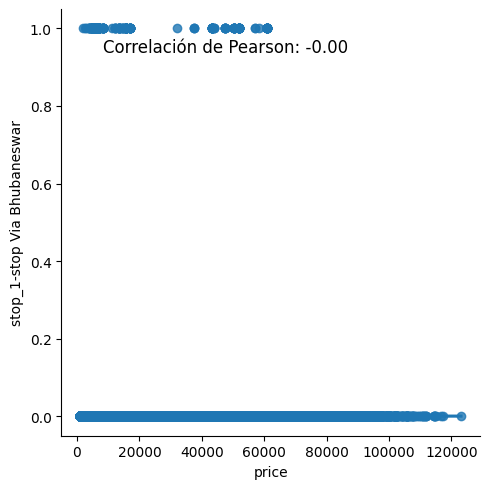

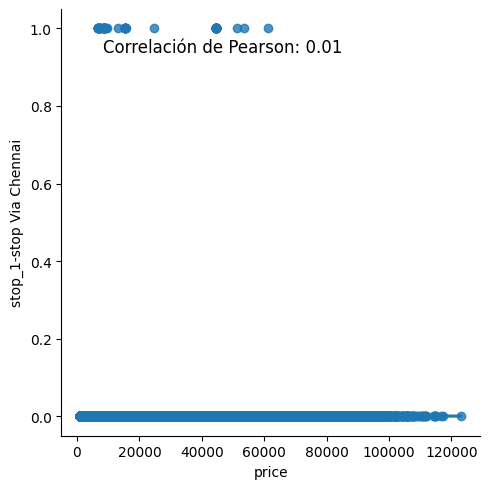

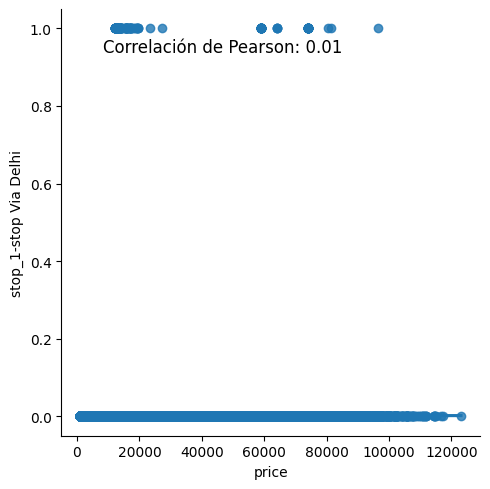

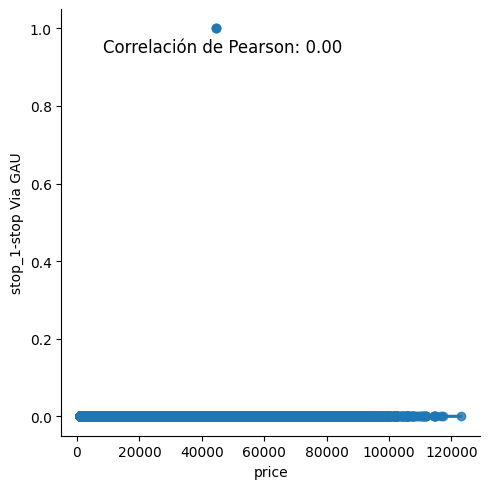

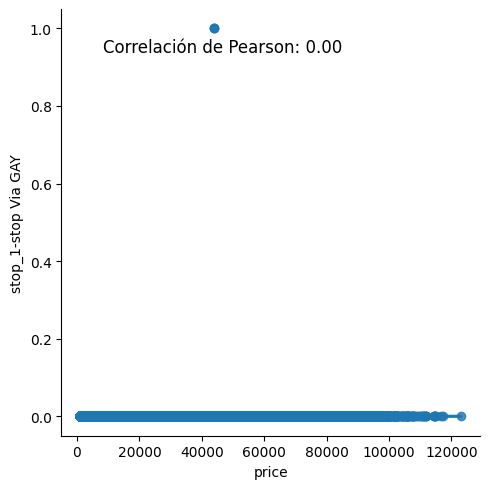

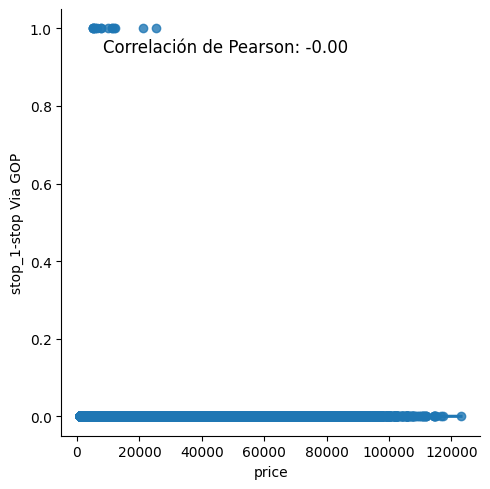

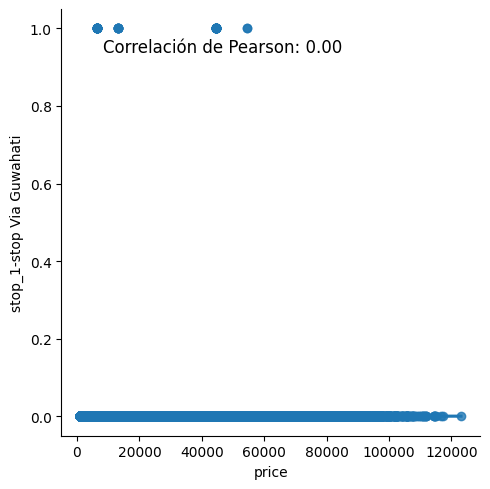

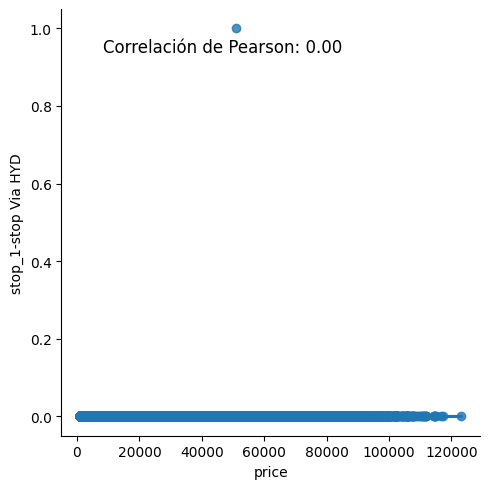

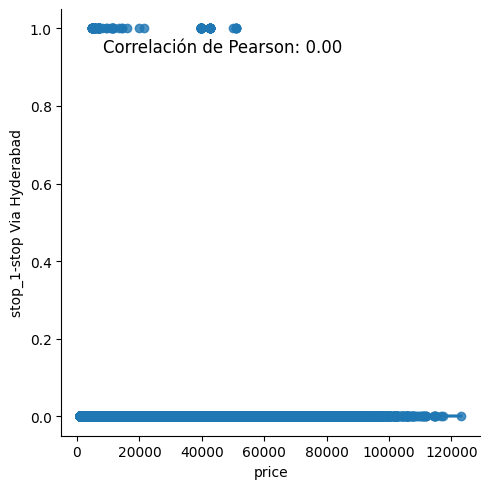

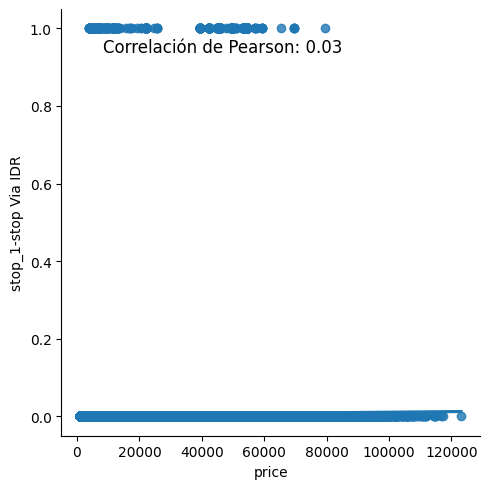

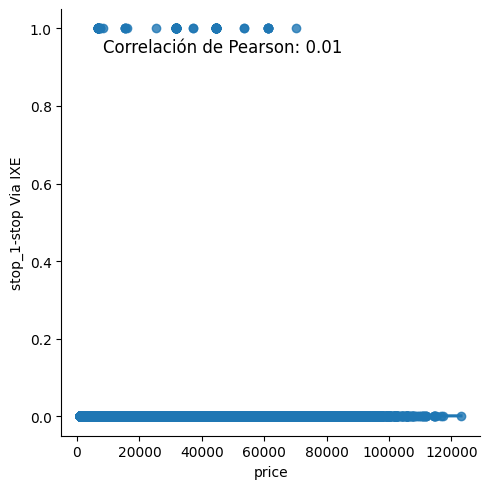

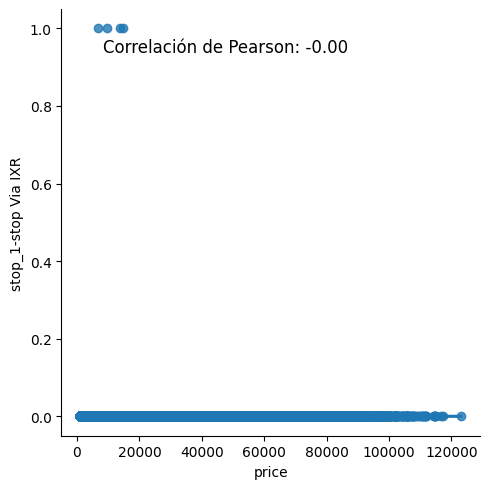

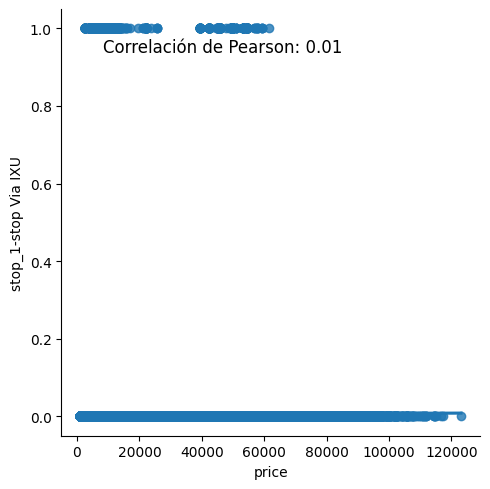

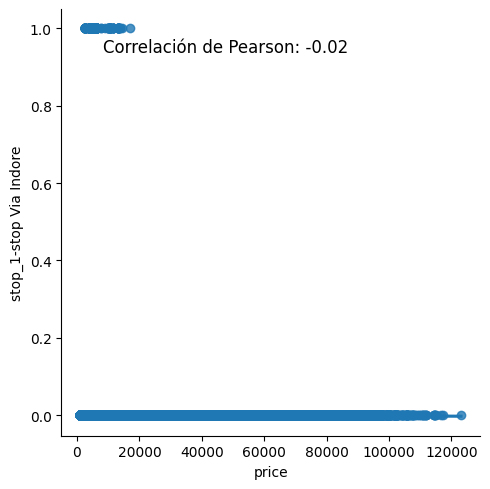

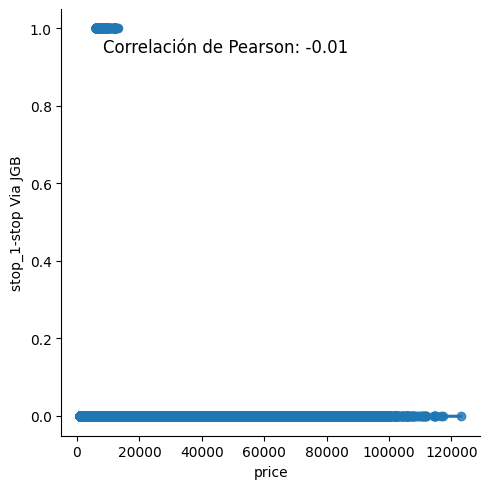

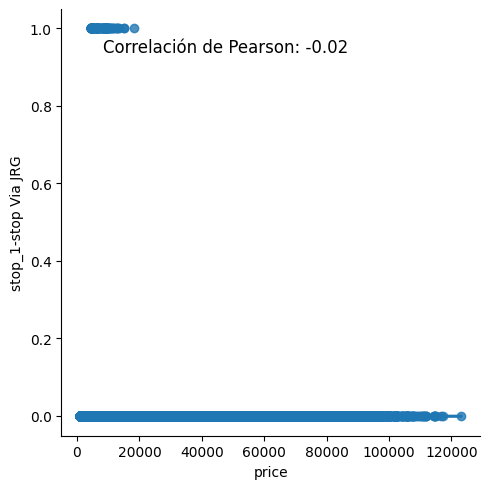

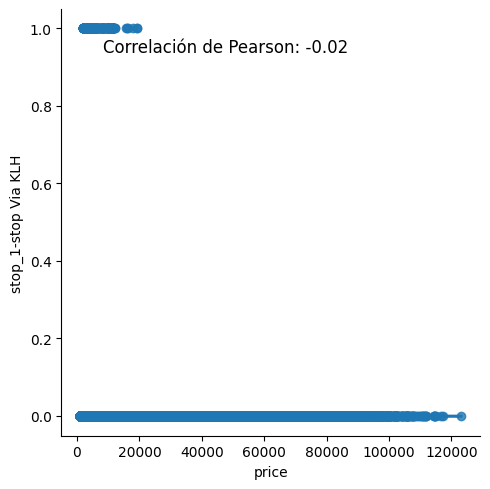

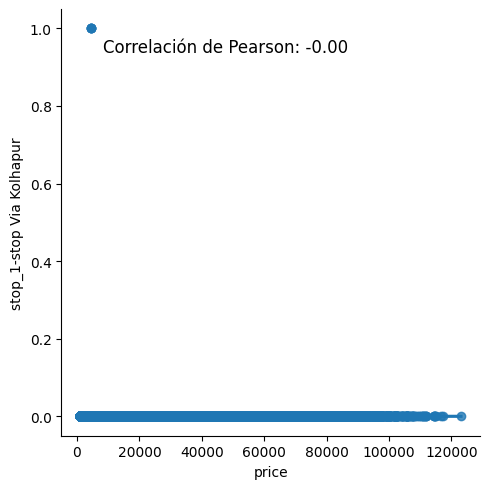

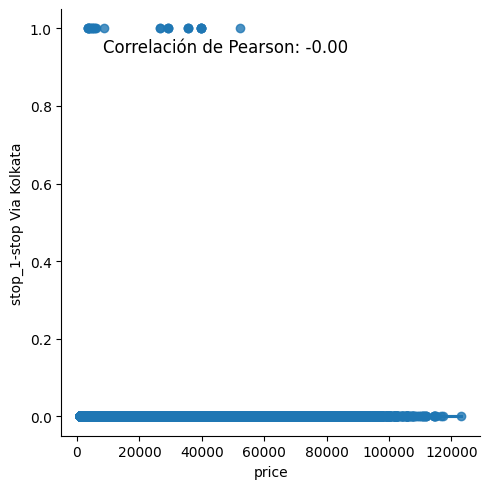

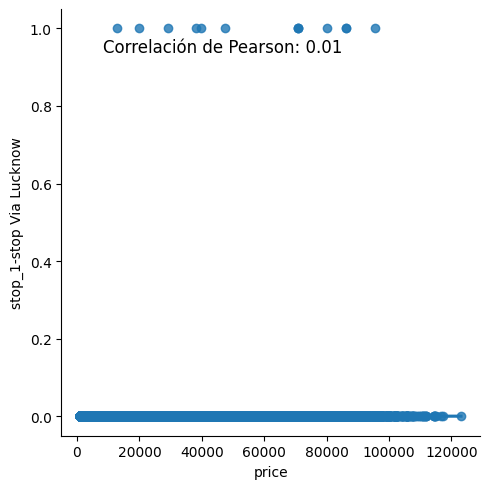

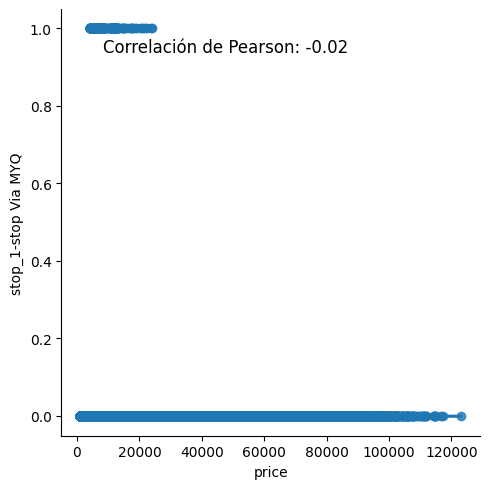

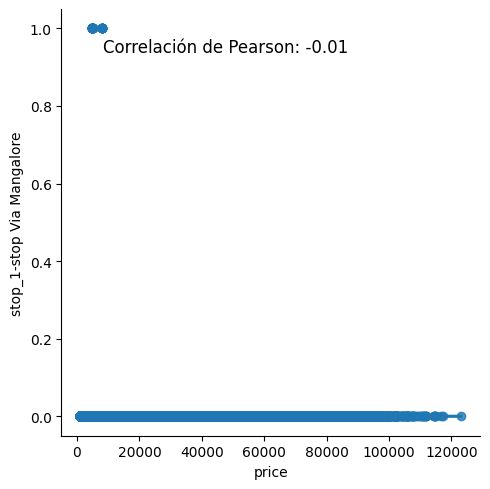

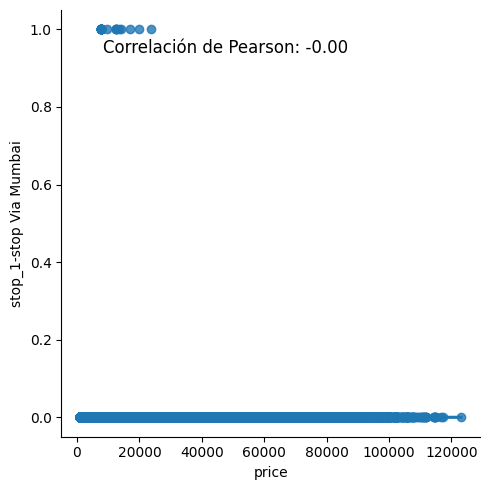

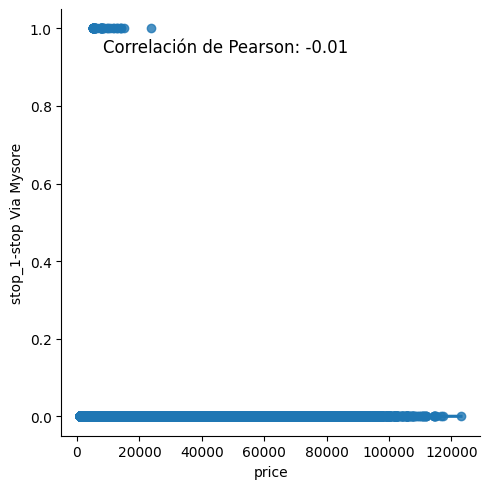

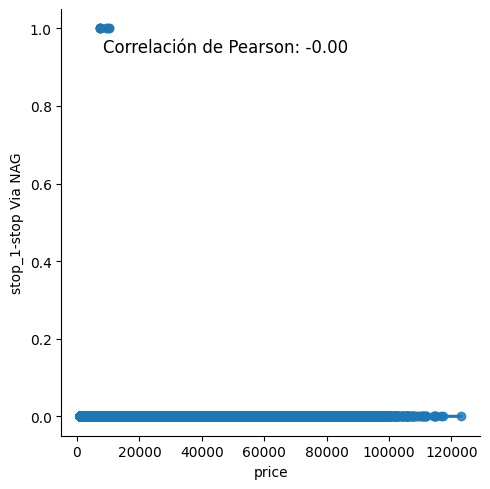

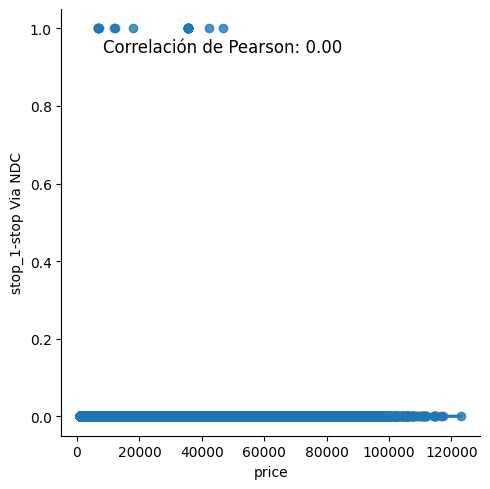

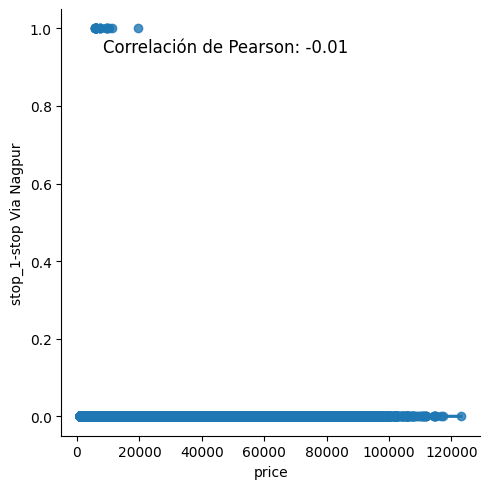

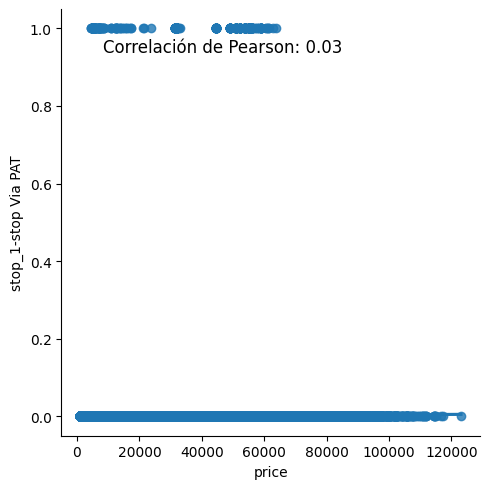

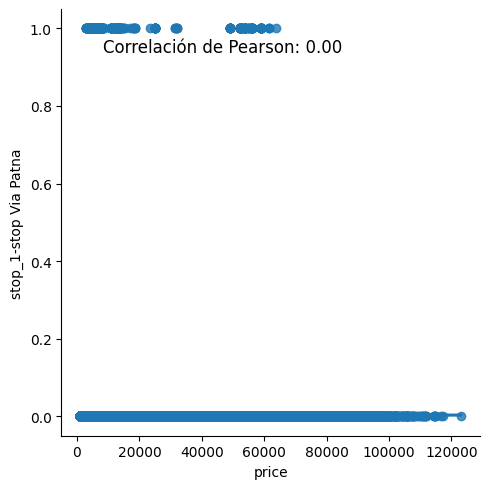

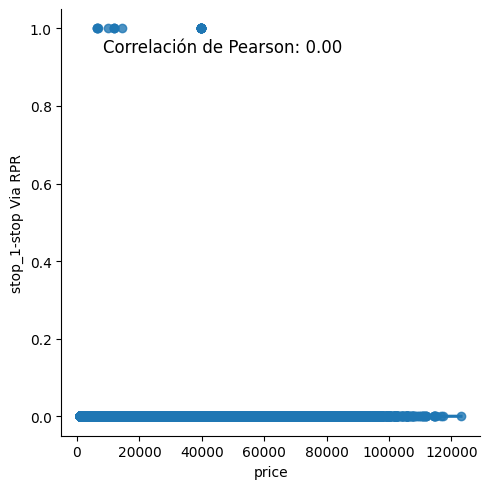

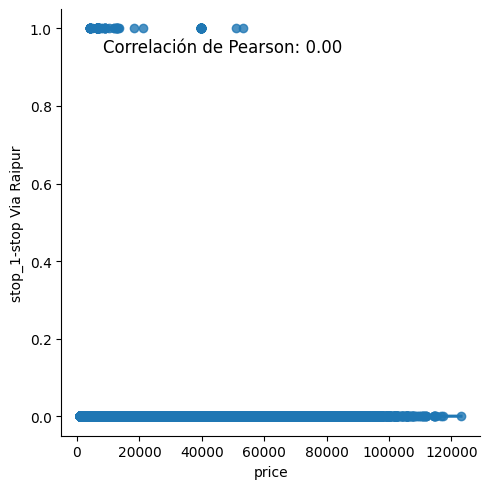

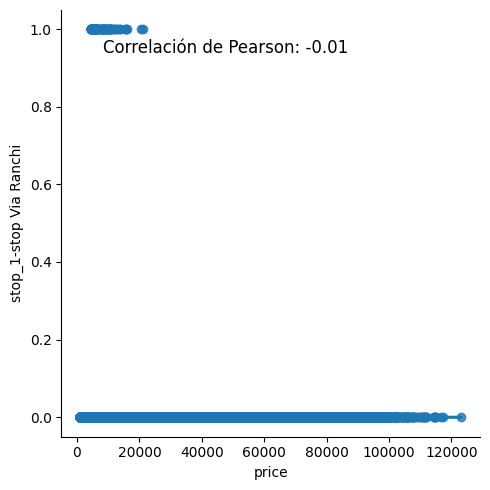

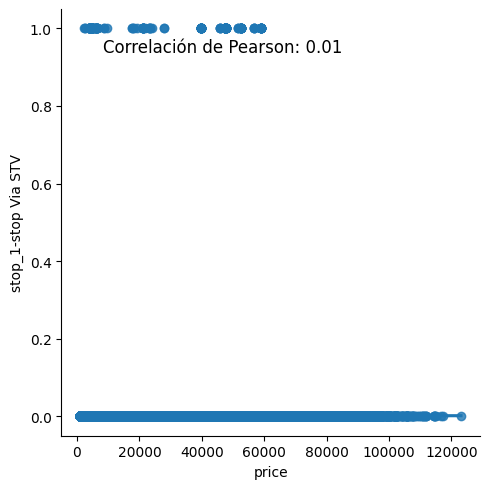

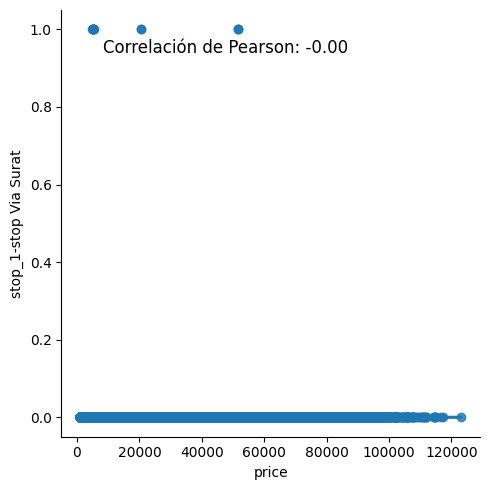

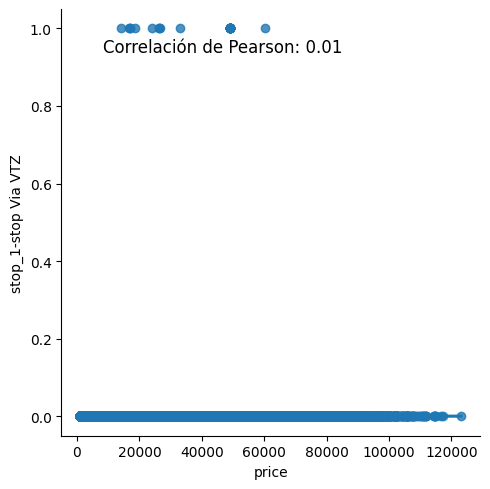

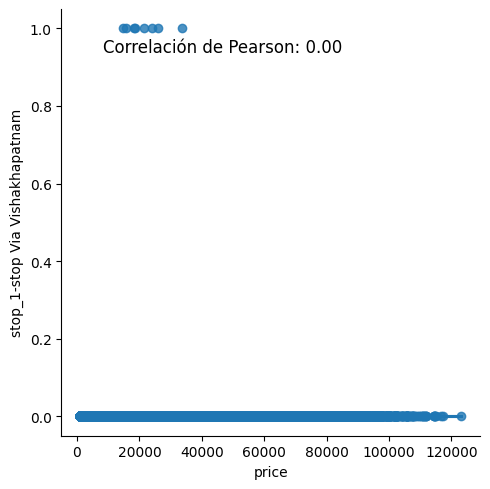

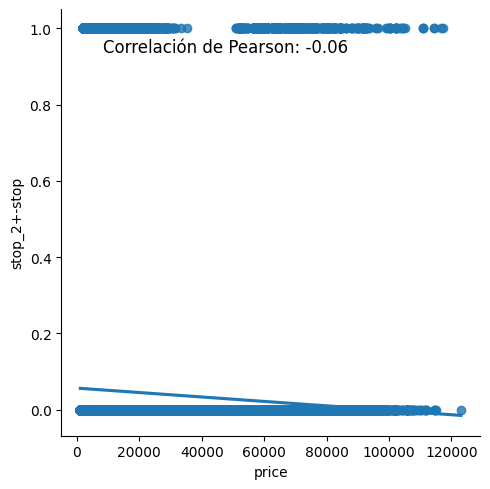

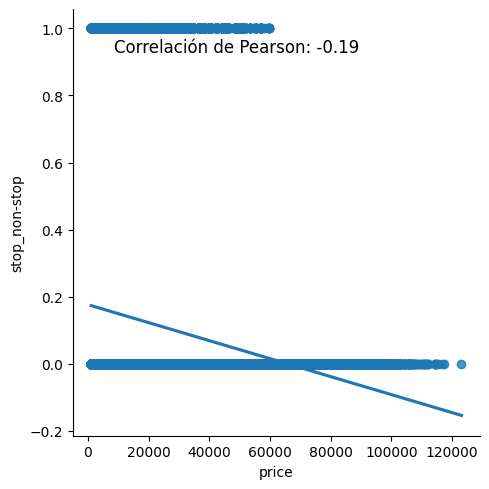

In [239]:
# Aplicaremos la funcion para cada una de las variables numéricas vs. el precio del boleto de avión:
for i in df_merged_dummy_var.columns.values.tolist():
    plot_lmplot_with_pearson(df_merged_dummy_var, 'price', i)

### Uso de Modelo Lasso para la Selección de Características

In [243]:
# Debemos procesar el tipo de campo timestampt
df_merged.dtypes

date                datetime64[ns]
airline                     object
ch_code                     object
num_code                     int64
dep_time            datetime64[ns]
from                        object
time_taken                  object
stop                        object
arr_time            datetime64[ns]
to                          object
price                        int64
type                        object
hours                        int32
minutes                      int32
time_taken_min               int32
time_taken_hours           float64
dtype: object

In [245]:
df_merged.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,type,hours,minutes,time_taken_min,time_taken_hours
0,2022-02-11,Air India,AI,868,1900-01-01 18:00:00,Delhi,02h 00m,non-stop,1900-01-01 20:00:00,Mumbai,25612,business,2,0,120,2.000000
1,2022-02-11,Air India,AI,624,1900-01-01 19:00:00,Delhi,02h 15m,non-stop,1900-01-01 21:15:00,Mumbai,25612,business,2,15,135,2.250000
2,2022-02-11,Air India,AI,531,1900-01-01 20:00:00,Delhi,24h 45m,1-stop,1900-01-01 20:45:00,Mumbai,42220,business,24,45,1485,24.750000
3,2022-02-11,Air India,AI,839,1900-01-01 21:25:00,Delhi,26h 30m,1-stop,1900-01-01 23:55:00,Mumbai,44450,business,26,30,1590,26.500000
4,2022-02-11,Air India,AI,544,1900-01-01 17:15:00,Delhi,06h 40m,1-stop,1900-01-01 23:55:00,Mumbai,46690,business,6,40,400,6.666667


In [62]:
df_merged['dep_time'] = pd.to_datetime(df_merged['dep_time'])
df_merged['arr_time'] = pd.to_datetime(df_merged['arr_time'])

In [63]:
df_merged['dep_time'] = df_merged['dep_time'].dt.strftime('%H:%M')
df_merged['arr_time'] = df_merged['arr_time'].dt.strftime('%H:%M')

In [64]:
print(df_merged[['dep_time', 'arr_time']].head())


  dep_time arr_time
0    18:00    20:00
1    19:00    21:15
2    20:00    20:45
3    21:25    23:55
4    17:15    23:55


In [65]:
# Procesamos la variable date para que pueda ser procesada correctamente:
df_merged_dummy['year'] = df_merged_dummy['date'].dt.year
df_merged_dummy['month'] = df_merged_dummy['date'].dt.month
df_merged_dummy['day'] = df_merged_dummy['date'].dt.day

# Después de crear las nuevas columnas, puedes eliminar la columna original
df_merged_dummy.drop('date', axis=1, inplace=True)

In [67]:
# Extraer la hora y el minuto
df_merged_dummy['arr_hour'] = df_merged_dummy['arr_time'].dt.hour
df_merged_dummy['arr_minute'] = df_merged_dummy['arr_time'].dt.minute
df_merged_dummy['dep_hour'] = df_merged_dummy['dep_time'].dt.hour
df_merged_dummy['dep_minute'] = df_merged_dummy['dep_time'].dt.minute

# Opcional: eliminar las columnas originales si ya no son necesarias
df_merged_dummy.drop(['arr_time', 'dep_time'], axis=1, inplace=True)

In [68]:
print(df_merged_dummy[['arr_hour', 'arr_minute', 'dep_hour', 'dep_minute']].isnull().sum())
                    

arr_hour      0
arr_minute    0
dep_hour      0
dep_minute    0
dtype: int64


In [72]:
import re

def convert_time_to_minutes(time_str):
    # Usamos expresiones regulares para capturar horas y minutos, si están presentes
    match = re.match(r"(?:(\d+\.?\d*)h)?\s*(?:(\d+\.?\d*)m)?", time_str)
    if not match:
        return None  # Si el formato no es válido, retornamos None o NaN
    
    hours = match.group(1)  # Capturamos las horas, si existen
    minutes = match.group(2)  # Capturamos los minutos, si existen

    # Convertimos horas y minutos a enteros o flotantes (en caso de decimales)
    hours = float(hours) if hours else 0
    minutes = float(minutes) if minutes else 0
    
    return int(hours * 60 + minutes)

# Aplicamos la función a la columna 'time_taken'
df_merged_dummy['time_taken_min'] = df_merged_dummy['time_taken'].apply(convert_time_to_minutes)

# Eliminamos la columna original si es necesario
df_merged_dummy.drop('time_taken', axis=1, inplace=True)

In [77]:
# Verifica si hay columnas no numéricas
non_numeric_columns = df_merged_dummy.drop('price', axis=1).select_dtypes(exclude=['number']).columns
print("Columnas no numéricas:", non_numeric_columns)

Columnas no numéricas: Index([], dtype='object')


In [78]:
# Verificar número de características en el dataframe
num_columns = df_merged_dummy.drop('price', axis=1).shape[1]
print(f"Número de características en df_merged_dummy: {num_columns}")

# Verificar número de coeficientes en el modelo
num_coefs = len(lasso_coefs)
print(f"Número de coeficientes en lasso_model: {num_coefs}")

Número de características en df_merged_dummy: 76
Número de coeficientes en lasso_model: 76


In [79]:
# Verificar si hay columnas duplicadas
duplicate_columns = df_merged_dummy.columns[df_merged_dummy.columns.duplicated()]
print(f"Columnas duplicadas: {duplicate_columns}")

# Verificar si hay valores nulos
missing_values = df_merged_dummy.isnull().sum().sum()
print(f"Número total de valores nulos: {missing_values}")

Columnas duplicadas: Index([], dtype='object')
Número total de valores nulos: 0


In [81]:
from sklearn.linear_model import LassoCV

# Incrementa los valores de alpha para hacer el modelo más estricto
lasso_model = LassoCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)  # Usa valores más grandes de alpha

# Entrena el modelo
X = df_merged_dummy.drop('price', axis=1)
y = df_merged_dummy['price']
lasso_model.fit(X, y)

# Obtén los coeficientes del modelo
lasso_coefs = lasso_model.coef_

# Seleccionar características relevantes
selected_features_lasso = X.columns[lasso_coefs != 0]
print("Características seleccionadas por Lasso:", selected_features_lasso)

C:\Users\56962\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3834403284295.824, tolerance: 10695114794.291317
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\56962\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4670204247608.158, tolerance: 13818663796.788458
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\56962\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4835489561705.5, tolerance: 13823634870.4263
  model = cd_fast.enet_coordinate_descent_gram(


Características seleccionadas por Lasso: Index(['num_code', 'hours', 'minutes', 'time_taken_min', 'airline_Vistara',
       'ch_code_AI', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'type_economy',
       'stop_non-stop', 'month', 'day', 'arr_hour', 'arr_minute', 'dep_hour',
       'dep_minute'],
      dtype='object')


In [89]:
# Como criterio propio, agregaremos la columna dummy que indica si el vuelo fue de tipo business o economy:
# Verifica que la columna 'type_economy' exista en df_merged_dummy
if 'type_economy' in df_merged_dummy.columns:
    # Agrega la columna 'type_economy' a selected_features_lasso
    selected_features_lasso = selected_features_lasso.append(pd.Index(['type_economy']))
    
    print("Características seleccionadas por Lasso después de agregar 'type_economy':", selected_features_lasso)
else:
    print("'economy' no existe en df_merged_dummy")

Características seleccionadas por Lasso después de agregar 'type_economy': Index(['num_code', 'hours', 'minutes', 'time_taken_min', 'airline_Vistara',
       'ch_code_AI', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'type_economy',
       'stop_non-stop', 'month', 'day', 'arr_hour', 'arr_minute', 'dep_hour',
       'dep_minute', 'type_economy'],
      dtype='object')


5. Realiza las transformaciones necesarias para realizar el modelamiento posterior y crea las variables que estimes convenientes con ayuda del análisis previo y la expertise del negocio.

In [94]:
selected_features_lasso

Index(['num_code', 'hours', 'minutes', 'time_taken_min', 'airline_Vistara',
       'ch_code_AI', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'type_economy',
       'stop_non-stop', 'month', 'day', 'arr_hour', 'arr_minute', 'dep_hour',
       'dep_minute', 'type_economy'],
      dtype='object')

Realizaremos las transformaciones para las variables seleccionadas por Lasso:

hours

minutes

time_taken_min

month

day

arr_hour

arr_minute

dep_hour

dep_minute

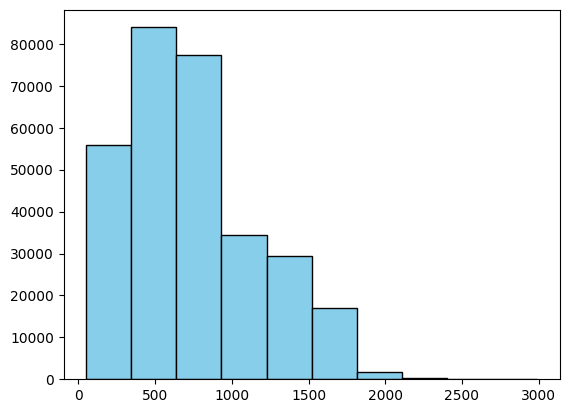

In [95]:
plt.hist(df_merged_dummy['time_taken_min'], bins=10, color='skyblue', edgecolor='black')
plt.show()

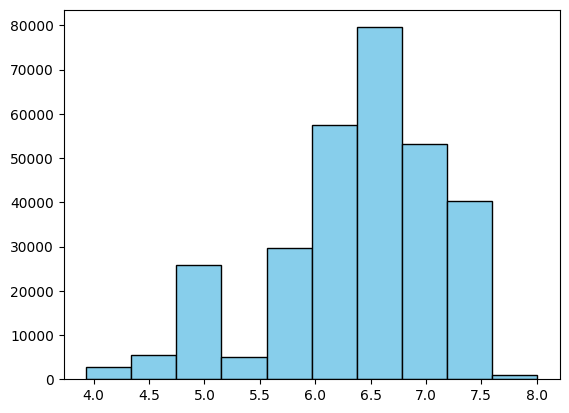

In [96]:
# Transformación Logarítmica:
df_merged_dummy['log_time_taken_min'] = np.log(df_merged_dummy['time_taken_min'] + 1)  # +1 para evitar log(0)
plt.hist(df_merged_dummy['log_time_taken_min'], bins=10, color='skyblue', edgecolor='black')
plt.show()

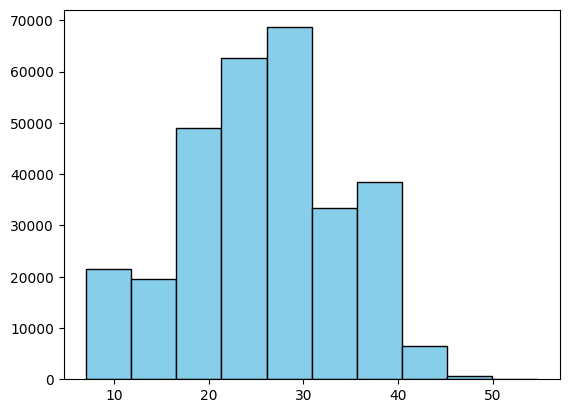

In [97]:
# Transformación Raíz Cuadrada:

df_merged_dummy['sqrt_time_taken_min'] = np.sqrt(df_merged_dummy['time_taken_min'])
plt.hist(df_merged_dummy['sqrt_time_taken_min'], bins=10, color='skyblue', edgecolor='black')
plt.show()

#### La transformación Raíz Cuadrada parece ser mejor candidata.

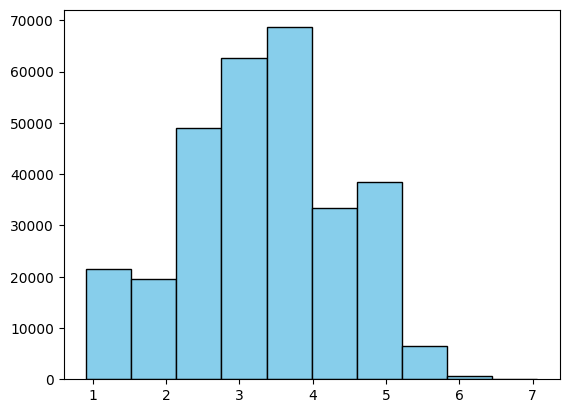

In [98]:
df_merged_dummy['sqrt_time_taken_hours'] = np.sqrt(df_merged_dummy['time_taken_hours'])
plt.hist(df_merged_dummy['sqrt_time_taken_hours'], bins=10, color='skyblue', edgecolor='black')
plt.show()

6. Genera una función que encapsule el tratamiento de datos necesario, para entregar
un dataset limpio y procesado a partir del dataset original.

In [69]:
def dataframe_process(df_business, df_economy):
    df_business['type'] = 'business'
    df_economy['type'] = 'economy'
    
    df_merged = pd.concat([df_business, df_economy], ignore_index=True)
    
    df_merged['price'] = df_merged['price'].str.replace(',', '')
    df_merged['price'] =  pd.to_numeric(df_merged['price'])
    
    df_merged['dep_time'] = pd.to_datetime(df_merged['dep_time'], format = '%H:%M:%S')
    df_merged['arr_time'] = pd.to_datetime(df_merged['arr_time'], format = '%H:%M:%S')
    
    df_merged['date'] = pd.to_datetime(df_merged['date'], format='%Y-%m-%d')
    
    # Procesamiento campo stop:
    # Limpiar los datos eliminando saltos de línea y tabulaciones
    df_merged['stop'] = df_merged['stop'].str.replace(r'\s+', ' ', regex=True).str.strip()

    # Eliminar el prefijo "Via" en caso de que no haya una ciudad
    df_merged['stop'] = df_merged['stop'].str.replace(r' Via ', ' Via ', regex=True)
    
    # Transformación time_taken:
    df_merged['hours'] = df_merged['time_taken'].str.extract(r'(\d+)h').fillna(0).astype(int)
    df_merged['minutes'] = df_merged['time_taken'].str.extract(r'(\d+)m').fillna(0).astype(int)
    
    df_merged['time_taken_min'] = df_merged['hours'] * 60 + df_merged['minutes']
    df_merged['time_taken_hours'] = df_merged['time_taken_min'] / 60
    
    # Obtención Dummy Variables:
    df_merged_dummy = pd.get_dummies(df_merged, columns=['airline', 'ch_code', 'from', 'to', 'type'], drop_first=True)

    # Transformación Raíz Cuadrada:
    df_merged_dummy['sqrt_time_taken_min'] = np.sqrt(df_merged_dummy['time_taken_min'])
    df_merged_dummy['sqrt_time_taken_hours'] = np.sqrt(df_merged_dummy['time_taken_hours'])
    
    return df_merged_dummy

7. Elige al menos 3 modelos candidatos para resolver el problema. A partir de esto,
genera un conjunto de entrenamiento y prueba, para luego entrenar los diferentes
modelos.

In [101]:
# Importación de Librerías:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


Características seleccionadas:

* to_Hyderabad

* to_Chennai

* from_Hyderabad

SELECCIONAREMOS time_taken_min CON TRANSFORMACIÓN RAÍZ CUADRADA, PERO NO SELECCIONAREMOS time_taken_hours PARA EVITAR MULTICOLINEALIDAD. LO MISMO CON MINUTES

* time_taken_min con Transformación Raíz Cuadrada (sqrt_time_taken_min)

In [99]:
# Características:
X = df_merged_dummy[selected_features_lassoted_features_lasso]

# Variable Objetivo: Price
y = df_merged_dummy['price']

In [102]:
# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

### Regresión Lineal


In [104]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train, y_train)

LinearRegression()

In [105]:
# Realizar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test)

In [106]:
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

Error Cuadrático Medio (MSE): 46458514.67683231
R^2: 0.9095919677644427


### Arbol de Decisión



In [110]:
from sklearn.tree import DecisionTreeRegressor

# Características:
X = df_merged_dummy[selected_features_lasso]

# Variable Objetivo: Price
y = df_merged_dummy['price']

# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión para regresión
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

Error Cuadrático Medio (MSE): 8979072.909202889
R^2: 0.9825267699867846


### K-Nearest Neighbors

In [108]:
from sklearn.neighbors import KNeighborsRegressor

# Crear el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el número de vecinos K

# Entrenar el modelo
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [109]:
# Realizar predicciones
y_pred = knn_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

Error Cuadrático Medio (MSE): 226409648.56208748
R^2: 0.5594079804740313


8. Elige una grilla de hiperparametros y luego optimízalos, buscando la mejor
combinación para cada grilla. Guardar los modelos entrenados.

In [111]:
# Importación de Librerías:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [112]:
# Definir la grilla de hiperparámetros:

# Grilla para Ridge
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Grilla para Árbol de Decisión
tree_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grilla para K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance']
}

In [113]:
# Optimización de Hiperparámetros:

# Modelo Ridge
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros para Ridge:", ridge_grid_search.best_params_)
print("Mejor MSE para Ridge:", -ridge_grid_search.best_score_)

Mejores hiperparámetros para Ridge: {'alpha': 1.0}
Mejor MSE para Ridge: 45579172.73904686


In [114]:
# Modelo Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_grid_search = GridSearchCV(estimator=tree_model, param_grid=tree_param_grid, cv=5, scoring='neg_mean_squared_error')
tree_grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros para el Árbol de Decisión:", tree_grid_search.best_params_)
print("Mejor MSE para el Árbol de Decisión:", -tree_grid_search.best_score_)


Mejores hiperparámetros para el Árbol de Decisión: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mejor MSE para el Árbol de Decisión: 7639187.970704639


In [ ]:
# Modelo K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros para KNN:", knn_grid_search.best_params_)
print("Mejor MSE para KNN:", -knn_grid_search.best_score_)

In [ ]:
# Uso de joblib para guardar los modelos sin tener que entrenarlos de nuevo:

import joblib

# Guardar los modelos
joblib.dump(ridge_grid_search.best_estimator_, 'ridge_model.pkl')
joblib.dump(tree_grid_search.best_estimator_, 'tree_model.pkl')
joblib.dump(knn_grid_search.best_estimator_, 'knn_model.pkl')

9. Define al menos 3 métricas para evaluar los modelos entrenados y genera gráficos de comparación. Elige un baseline para ver qué tan buena es tu opción respecto a ese baseline y concluye.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predicciones de los modelos optimizados
ridge_predictions = ridge_grid_search.best_estimator_.predict(X_test)
tree_predictions = tree_grid_search.best_estimator_.predict(X_test)
knn_predictions = knn_grid_search.best_estimator_.predict(X_test)

# Línea base: predecir la media
baseline_prediction = np.mean(y_test)
baseline_predictions = np.full(y_test.shape, baseline_prediction)

# Calcular métricas para cada modelo
metrics = {
    'Baseline': {
        'MSE': mean_squared_error(y_test, baseline_predictions),
        'RMSE': np.sqrt(mean_squared_error(y_test, baseline_predictions)),
        'R^2': r2_score(y_test, baseline_predictions)
    },
    'Ridge': {
        'MSE': mean_squared_error(y_test, ridge_predictions),
        'RMSE': np.sqrt(mean_squared_error(y_test, ridge_predictions)),
        'R^2': r2_score(y_test, ridge_predictions)
    },
    'Decision Tree': {
        'MSE': mean_squared_error(y_test, tree_predictions),
        'RMSE': np.sqrt(mean_squared_error(y_test, tree_predictions)),
        'R^2': r2_score(y_test, tree_predictions)
    },
    'KNN': {
        'MSE': mean_squared_error(y_test, knn_predictions),
        'RMSE': np.sqrt(mean_squared_error(y_test, knn_predictions)),
        'R^2': r2_score(y_test, knn_predictions)
    }
}

# Mostrar métricas
for model, metrics_values in metrics.items():
    print(f"Modelo: {model}")
    for metric, value in metrics_values.items():
        print(f"{metric}: {value:.2f}")
    print()

In [ ]:
# Crear gráficos de comparación
labels = list(metrics.keys())
mse_values = [metrics[label]['MSE'] for label in labels]
rmse_values = [metrics[label]['RMSE'] for label in labels]
r2_values = [metrics[label]['R^2'] for label in labels]

x = np.arange(len(labels))  # el índice de las etiquetas

# Configuración del gráfico
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de MSE
ax[0].bar(x, mse_values, color='lightblue')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_title('Comparación de MSE')
ax[0].set_ylabel('MSE')

# Gráfico de RMSE
ax[1].bar(x, rmse_values, color='lightgreen')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_title('Comparación de RMSE')
ax[1].set_ylabel('RMSE')

# Gráfico de R²
ax[2].bar(x, r2_values, color='salmon')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].set_title('Comparación de R²')
ax[2].set_ylabel('R²')

plt.tight_layout()
plt.show()

10. Genera una conclusión final respecto a qué tan útiles son los resultados encontrados
para resolver el problema propuesto y define cuáles podrían ser los próximos pasos
para el proyecto.